# Part I - (Loan Data from Prosper)
## by (Jennifer Nwamu)

## Introduction
> This data set contains information of 113,937 loans with 81 different features/information about the loans given by propser which includes, loan amount, loan status, borrower's interest rate, employment status, borrower's income, and many others.




## Preliminary Wrangling


In [286]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import *
from matplotlib import rcParams
from datetime import datetime
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. 

In [287]:
df_data = pd.read_csv('prosperLoanData.csv')
print(df_data.info())
df_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### What is the structure of your dataset?

> The dataset is composed of 113,938 rows of data with 81 columns/attributes of these data. Most of the data are numeric data type. Some of the columns attributes should be a either are cateogorical or date time data type which has not been captured but given a generic object or float data type.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset is the loan status and borrower's APR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support the investigation into understanding the loan status are mostly demographics about the borrowers such as Employment status, Credit rating, prosper score, Loan Term, Loan amount, occupation and monthly income amongst others.
This will help answer the below questions:
1. What factors affects the loan status?
2. What factors affects the borrowersAPR?
3. What factors affect the loan amount granted?

> There's need to perform some cleaning on these data. The next step details summary of the cleaning to be done after some basic assessment of the data

### Cleaning 

1. Irrelavant Columns needed for analysis.
2. Some Column headers such as `PropserRating` and `ListingCategory` is too long.
3. Values in  `ListingCategory` is numeric and not understandable.
4. Different rating columns(`CreditGrade` and `ProsperRating`).
5. Null values in columns:`CreditGrade`, `ProsperRating`, `EmploymentStatus`,`Occupation` and `BorrowersAPR` (Rest of the  columns with Null values won't be cleaned as this doesn't affect the analysis).
6. Incorrect data types.

#### 1. Irrelevant Columns needed for analysis

#### Define

A copy of the dataframe with only columns needed to be used for the analysis should be created

#### Code

In [288]:
#Select columns needed to perform the analysis and store in a new dataframe
loans_data = df_data.loc[:,('ListingCreationDate',
                            'CreditGrade',
                            'Term',
                            'LoanStatus',
                            'ClosedDate',
                            'BorrowerAPR',
                            'BorrowerRate',
                            'LenderYield',
                            'ProsperRating (Alpha)',
                            'ProsperScore',
                            'ListingCategory (numeric)',
                            'BorrowerState',
                            'Occupation',
                            'EmploymentStatus',
                            'IsBorrowerHomeowner',
                            'AmountDelinquent',
                            'DebtToIncomeRatio',
                            'IncomeRange',
                            'IncomeVerifiable',
                            'StatedMonthlyIncome',
                            'LoanCurrentDaysDelinquent',
                            'LoanMonthsSinceOrigination',
                            'LoanOriginalAmount',
                            'LoanOriginationDate',
                            'LoanOriginationQuarter',
                            'MonthlyLoanPayment',
                            'LP_ServiceFees',
                            'LP_CollectionFees',
                            'PercentFunded',
                            'Investors' ) ]
                            
                          

#### Test

In [289]:
# Check to see if the relevant columns has been created in the new dataframe
pd.set_option('display.max_columns', None)
print(loans_data.info())
loans_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingCreationDate         113937 non-null  object 
 1   CreditGrade                 28953 non-null   object 
 2   Term                        113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   ClosedDate                  55089 non-null   object 
 5   BorrowerAPR                 113912 non-null  float64
 6   BorrowerRate                113937 non-null  float64
 7   LenderYield                 113937 non-null  float64
 8   ProsperRating (Alpha)       84853 non-null   object 
 9   ProsperScore                84853 non-null   float64
 10  ListingCategory (numeric)   113937 non-null  int64  
 11  BorrowerState               108422 non-null  object 
 12  Occupation                  110349 non-null  object 
 13  EmploymentStat

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,True,472.0,0.17,"$25,000-49,999",True,3083.333333,0,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,-133.18,0.0,1.0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0.00,0.0,1.0,1
2,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,False,NaN,0.06,Not displayed,True,2083.333333,0,86,3001,2007-01-17 00:00:00,Q1 2007,123.32,-24.20,0.0,1.0,41
3,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,-108.01,0.0,1.0,158
4,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,-60.27,0.0,1.0,20
5,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,B,10.0,1,NM,Professional,Employed,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,15000,2013-12-24 00:00:00,Q4 2013,342.37,-25.33,0.0,1.0,1
6,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,E,2.0,1,KS,Sales - Retail,Employed,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,3000,2013-04-18 00:00:00,Q2 2013,122.67,-22.95,0.0,1.0,1
7,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,C,4.0,2,CA,Laborer,Employed,False,0.0,0.24,"$25,000-49,999",True,3355.750000,0,10,10000,2013-05-13 00:00:00,Q2 2013,372.60,-69.21,0.0,1.0,1
8,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,AA,9.0,7,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,-16.77,0.0,1.0,1
9,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,AA,11.0,7,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,-16.77,0.0,1.0,1


> Over half of the features which were deemed irrelavant to our analysis have been removed and we are left with 30 features to   work with from henceforth.

#### 2. Some Column headers such as` PropserRating` and `ListingCategory` is too long

#### Define

Rename the column headers in `ProsperRating (Alpha)` and `ListingCategory (numeric)`

#### Code

In [291]:
#Rename the columns header
loans_data = loans_data.rename(columns={'ProsperRating (Alpha)':'ProsperRating', 
                                        'ListingCategory (numeric)':'ListingCategory'})

#### Test

In [292]:
#check to see this has been done
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingCreationDate         113937 non-null  object 
 1   CreditGrade                 28953 non-null   object 
 2   Term                        113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   ClosedDate                  55089 non-null   object 
 5   BorrowerAPR                 113912 non-null  float64
 6   BorrowerRate                113937 non-null  float64
 7   LenderYield                 113937 non-null  float64
 8   ProsperRating               84853 non-null   object 
 9   ProsperScore                84853 non-null   float64
 10  ListingCategory             113937 non-null  int64  
 11  BorrowerState               108422 non-null  object 
 12  Occupation                  110349 non-null  object 
 13  EmploymentStat

#### 3. Values in  `ListingCategory` is numeric and not understandable

#### Define

Replace the the numeric values with it's description

#### Code

In [293]:
#replacing the numeric values to the description
loans_data['ListingCategory'].replace(to_replace=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                     value=['Not Available',
                                            'Debt Consolidation',
                                            'Home Improvement',
                                            'Business',
                                            'Personal Loan',
                                            'Student Use',
                                            'Auto',
                                            'Other',
                                            'Baby&Adoption',
                                            'Boat',
                                            'Cosmetic Procedure',
                                            'Engagement Ring',
                                            'Green Loans',
                                            'Household Expenses',
                                            'Large Purchases',
                                            'Medical/Dental',
                                            'Motorcycle,',
                                            'RV',
                                            'Taxes',
                                            'Vacation',
                                            'Wedding Loans']
                                     ,inplace=True)

#### Test

In [294]:
#Check to confirm 
loans_data['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle,',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### 4. Different rating columns(`CreditGrade` and `ProsperRating`)

#### Define

Merge `ProsperRating` and `CreditGrade` columns into `Rating` since they both refer to ratings one is before 2009 and the other after 2009 and drop the columns

#### Code

In [295]:
#Concatenating the Credit Grade and Prosper Rating into one single column>
loans_data['Rating'] = loans_data.ProsperRating.fillna(loans_data.CreditGrade)

In [296]:
#Dropping the columns
loans_data= loans_data.drop(['ProsperRating','CreditGrade'], axis=1)

#### Test

In [297]:
#Checks to confirm changes
print(loans_data['Rating'].unique())
loans_data.head(10)

['C' 'A' 'HR' 'D' 'B' 'E' 'AA' nan 'NC']


,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors,Rating
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,Not Available,CO,Other,Self-employed,True,472.0,0.17,"$25,000-49,999",True,3083.333333,0,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,-133.18,0.0,1.0,258,C
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,7.0,Home Improvement,CO,Professional,Employed,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0.00,0.0,1.0,1,A
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,Not Available,GA,Other,Not available,False,NaN,0.06,Not displayed,True,2083.333333,0,86,3001,2007-01-17 00:00:00,Q1 2007,123.32,-24.20,0.0,1.0,41,HR
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,9.0,"Motorcycle,",GA,Skilled Labor,Employed,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,-108.01,0.0,1.0,158,A
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,4.0,Home Improvement,MN,Executive,Employed,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,-60.27,0.0,1.0,20,D
5,2013-12-14 08:26:37.093000000,60,Current,NaN,0.15425,0.1314,0.1214,10.0,Debt Consolidation,NM,Professional,Employed,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,15000,2013-12-24 00:00:00,Q4 2013,342.37,-25.33,0.0,1.0,1,B
6,2013-04-12 09:52:56.147000000,36,Current,NaN,0.31032,0.2712,0.2612,2.0,Debt Consolidation,KS,Sales - Retail,Employed,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,3000,2013-04-18 00:00:00,Q2 2013,122.67,-22.95,0.0,1.0,1,E
7,2013-05-05 06:49:27.493000000,36,Current,NaN,0.23939,0.2019,0.1919,4.0,Home Improvement,CA,Laborer,Employed,False,0.0,0.24,"$25,000-49,999",True,3355.750000,0,10,10000,2013-05-13 00:00:00,Q2 2013,372.60,-69.21,0.0,1.0,1,C
8,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,9.0,Other,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,-16.77,0.0,1.0,1,AA
9,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,11.0,Other,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,-16.77,0.0,1.0,1,AA


#### 5. Null values in columns:`Rating`, `EmploymentStatus`,`Occupation` and `BorrowerAPR`

#### Define
1. Remove rows that have no ratings since ratings would be an important feature in the analysis in predicting if a borrower would default or not.
2. Remove rows with no BorrowersAPR.
3. Replace Null values in the `EmploymentStatus` and `Occupation` column with unknown as it was not filled

#### Code

In [298]:
#Get the index of rows with null values in Rating
rating_null = loans_data[pd.isnull(loans_data['Rating'])].index
#Drop those index and reset the index
loans_data.drop(index=rating_null, inplace=True)

In [299]:
#Get the index of rows with null values in BorrowersAPR
apr_null = loans_data[pd.isnull(loans_data['BorrowerAPR'])].index
#Drop those index and reset the index
loans_data.drop(index=apr_null, inplace=True)
loans_data.reset_index(inplace=True)

In [300]:
#Replacing Null values with Unknown
loans_data['EmploymentStatus'].fillna('Unknown', inplace=True)

In [301]:
#Replacing Null values with Unknown
loans_data['Occupation'].fillna('Unknown', inplace=True)

#### Test

In [302]:
#Check to confirm if null values exist
loans_data['Rating'].isnull().sum()

0

In [303]:
#Check to confirm if null values exist
loans_data['BorrowerAPR'].isnull().sum()

0

In [304]:
#Check to confirm 
loans_data['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Unknown', 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [305]:
#Check to confirm 
loans_data['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Unknown', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chem

#### 6. Incorrect Data types

#### Define

Fix the incorrect data types assigned to date columns such as `ListingCreationDate`, `ClosedDate`, `LoanOriginationDate`and categorical columns such as `Occupation`,`Borrowerstate`,`LoanStatus`,`Term`,`EmploymentStatus`,`IncomeRange`,`ListingCategory`,`ProsperRating`,`ProsperScore` and `CreditGrade

#### Code

In [306]:
# list of unique values in ordinal categorical datatype
ratings=['NC','HR','E','D','C','B','A','AA']
income_range =['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

#creating a variable list for the columns with incorrect datatypes
nominal_datatype = ['Occupation', 'BorrowerState', 'LoanStatus','Term', 'EmploymentStatus', 'ListingCategory']

In [307]:
#Create a funtion to modify another datatype to datetime
def modifydatetime (df, columns):
    for column in columns:
        df[column]= pd.to_datetime(df[column])

In [308]:
#applying the function to modify the datetime columns
modifydatetime(loans_data, ['ListingCreationDate','ClosedDate','LoanOriginationDate'])

In [309]:
#Function to modify the categorical nominal datatypes
def modifydtypeN (df, columns, newdtype):
    for column in columns:
        df[column] = df[column].astype(newdtype)

In [310]:
#Applying the function on the list of categorical nominal datatypes
modifydtypeN(loans_data, nominal_datatype,'category')

In [311]:
#creating an ordered categorical datatype(ordinal)
#ordered_var1 = pd.api.types.CategoricalDtype(ordered = True,categories = prosper_score )
ordered_var2 = pd.api.types.CategoricalDtype(ordered = True,categories = ratings )
ordered_var3 = pd.api.types.CategoricalDtype(ordered = True,categories = income_range )
#loans_data['ProsperScores'] = loans_data['ProsperScores'].astype(ordered_var1)
loans_data['Rating'] = loans_data['Rating'].astype(ordered_var2)
loans_data['IncomeRange'] = loans_data['IncomeRange'].astype(ordered_var3)

#### Test

In [312]:
#Check to see confirm datatype changes
print(loans_data.Rating.unique())
print(loans_data.IncomeRange.unique())
loans_data.info()

['C', 'A', 'HR', 'D', 'B', 'E', 'AA', 'NC']
Categories (8, object): ['NC' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']
['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$75,000-99,999', '$1-24,999', 'Not employed', '$0']
Categories (8, object): ['Not displayed' < 'Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113781 entries, 0 to 113780
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   index                       113781 non-null  int64         
 1   ListingCreationDate         113781 non-null  datetime64[ns]
 2   Term                        113781 non-null  category      
 3   LoanStatus                  113781 non-null  category      
 4   ClosedDate                  54933 non-null   datetime64[ns]
 5   BorrowerAPR                 113781 non-

> Data has been cleaned up and ready to be stored for analysis. After the cleaning we have a total of 113781 records and 30 rows. Although there exists some null values such as closed date(Loan still ongoing) and Prosper scores(contains data from 2009) but those wouldn't affect the analysis.

#### Store

In [313]:
#Cleaned data can now be stored in a .csv file 
loans_data.to_csv('prosper1_loans.csv', index = False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


> We Begin with the categorical variables, for this a Bar Chart would be used to analyse the distributions of the various values

In [314]:
#Basic setup for Visualization, creating functions for labels and title
def plotlabels(xlabel, ylabel, title):
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    return plotlabels

#Specify the size 
plt.rcParams['figure.figsize'] = [12, 9]

#Specify color
c = sns.color_palette()[0]

In [315]:
#Function to Plot a Bar chart on the Y axis
def barplot_y(df, title,ycol,ylabel=None):
    #create the bar plot
    c = sns.color_palette()[0]
    #plt.figure(figsize=[10,5])
    if ylabel is None:
        ylabel=ycol
    #Assign the index of the value count to be used for ordering
    cat_order=df[ycol].value_counts().index
    sns.countplot(data=df, y=ycol,color=c,order=cat_order);
    plt.title(title);
    plt.xticks(rotation=90);
    plt.ylabel(ylabel);
    #adding annotations to show frequency
    df_count=df.shape[0]
    cat_counts=df[ycol].value_counts()
    locs, labels = plt.yticks()
    #Loop through the locs and labels in the plot to calculate and show the percentage of each loan status
    for loc,label in zip(locs, labels):
        #Retrieve the text property from the label and pass to the cat_count to get the category count
        count = cat_counts[label.get_text()]
        string = '{:0.1f}%'.format(100*count/df_count)
        # print the label
        plt.text(count+1700, loc+0.2, string, ha = 'center', color = 'black');
    plt.show();

In [316]:
#Function to Plot a Bar chart on the X axis
def barplot_x(df, title,xcol, xlabel=None):
    c = sns.color_palette()[0]
    plt.figure(figsize=[8,5])
    if xlabel is None:
        xlabel=xcol
    #Assign the index of the value count to be used for ordering
    cat_order=df[xcol].value_counts().index
    sns.countplot(data=df, x=xcol,color=c);
    plt.title(title);
    plt.xlabel(xlabel);
    #adding annotations to show frequency
    df_count=df.shape[0]
    cat_counts=df[xcol].value_counts()
    locs, labels = plt.xticks()
    #Loop through the locs and labels in the plot to calculate and show the percentage of each loan status
    for loc,label in zip(locs, labels):
        #Retrieve the text property from the label and pass to the cat_count to get the category count
        count = cat_counts[label.get_text()]
        string = '{:0.1f}%'.format(100*count/df_count)
        # print the label
        plt.text(loc,count-1500, string, ha = 'center', color = 'white');
    plt.show();

> Two functions where created based on the number of categorical values in the column. Larger values would use the `barplot_y`while few values would use the `barplot_x`.
Let's start by looking at the main variable of interest which is the `Loan Status` .

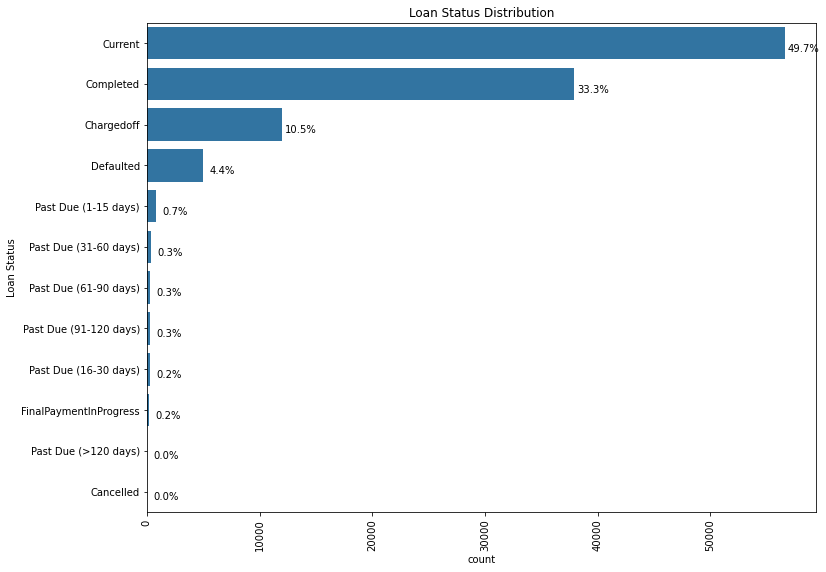

In [317]:
#Plot for Loan Status 
barplot_y(loans_data, 'Loan Status Distribution', 'LoanStatus', 'Loan Status')

> We can see that close to 50% of the Loans are still in progress (current) while almost close to nothing loans were cancelled. The percentage of the completed loans are more than those that were chargedoff and defaulted combined. This shows a good trend that loans are most likely to be completed.

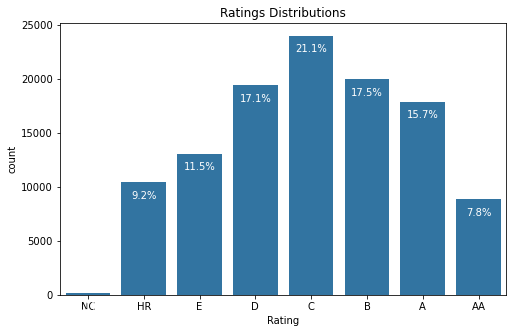

In [318]:
#Plot for Ratings Distribution
barplot_x(loans_data, 'Ratings Distributions', 'Rating')

> Most loan borrowers are rated `C` and the distribution of the ratings are normal. 7.8% of Loaners are rated `AA`. We would further check if it this factor influences the loan amount given. Next we visualize the most popular reason why people take loans classifed under `ListingCategory`

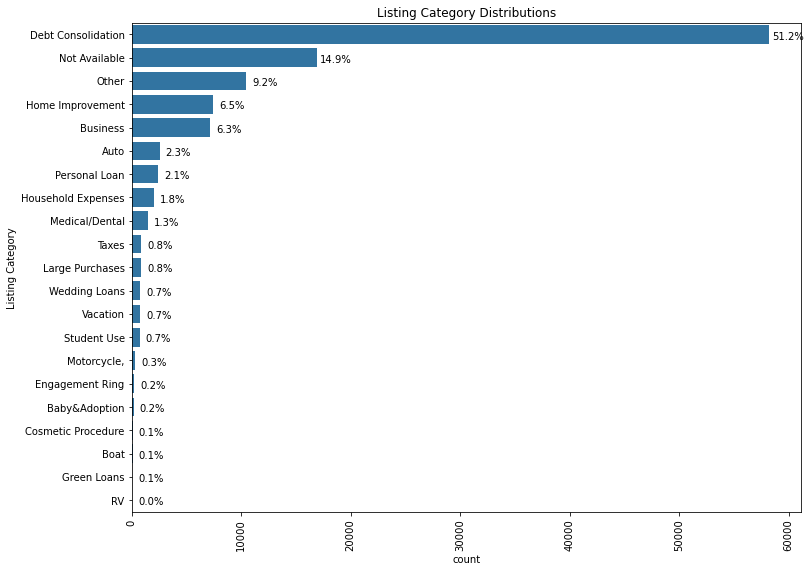

In [319]:
#Plot for Listing Category Distribution
barplot_y(loans_data, 'Listing Category Distributions', 'ListingCategory', 'Listing Category')

> Most of the reasons people take loans are due to Debt Consolidation at 51.2% while 14.9% of borrowers selected not available indicating either not to disclose or peharps their listing category options are not present in the list. Let's visualize the employment status of borrowers

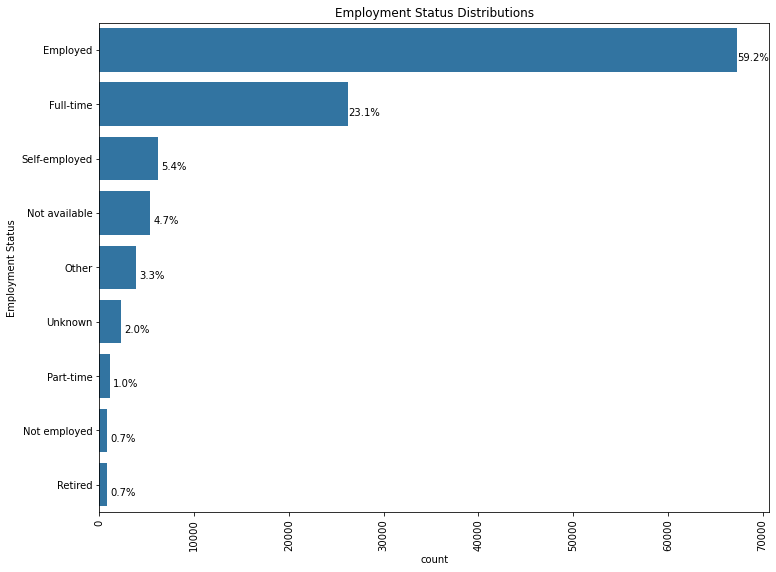

In [320]:
#Plot for Employment status Distribution
barplot_y(loans_data, 'Employment Status Distributions', 'EmploymentStatus', 'Employment Status')

Majority of the borrowers are employed, what are the common occupations that take loans 

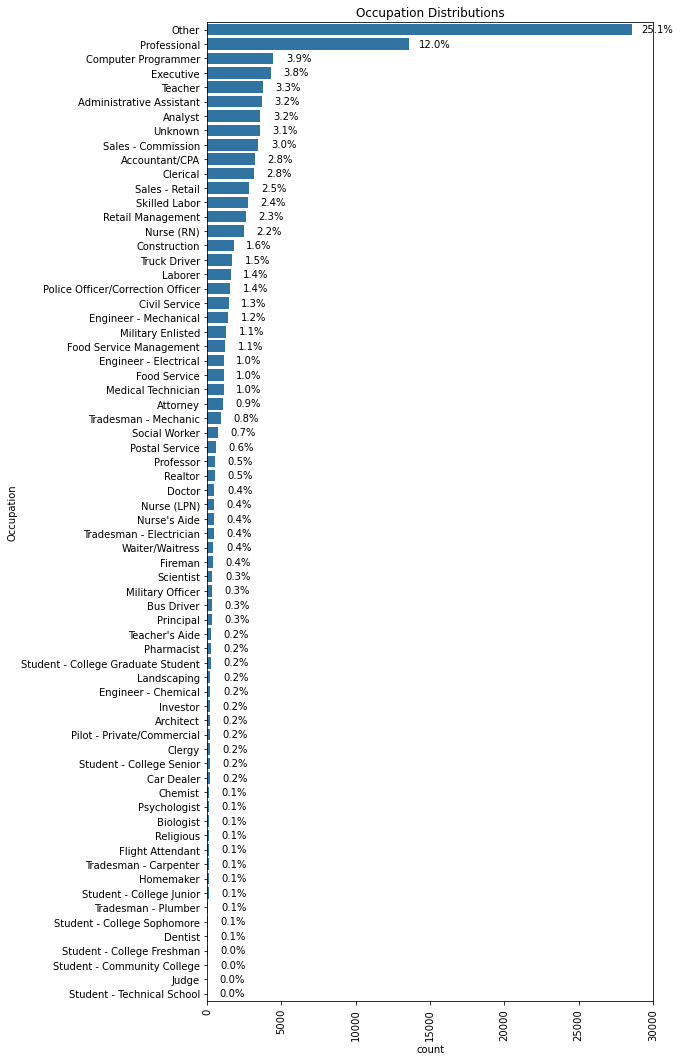

In [323]:
#Plot for Occupation Distribution
plt.figure(figsize=[8, 18])
barplot_y(loans_data, 'Occupation Distributions', 'Occupation')

> 25% of borrowers chose occupation as Others, there's no clear picture here of major occupation that tends to take out loan but we can see that professionals tends to take out loans than students.

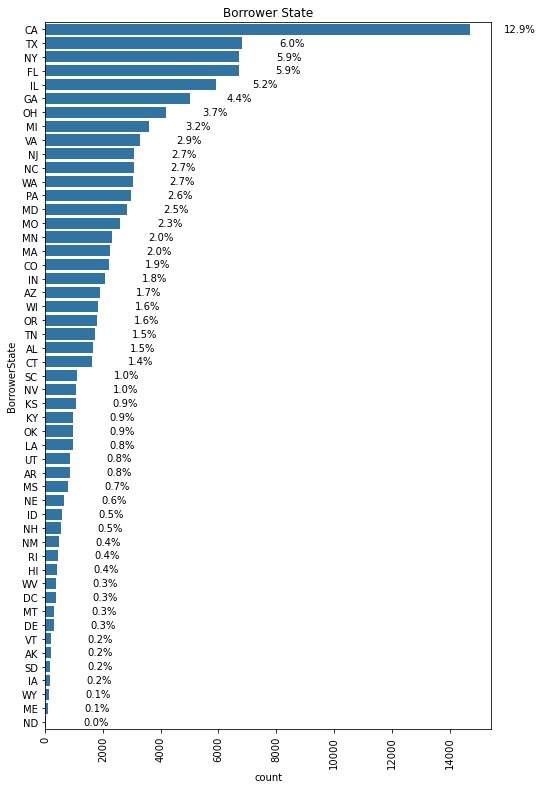

In [324]:
#Plot for Borrower Distribution
plt.figure(figsize=[8, 13])
barplot_y(loans_data, 'Borrower State', 'BorrowerState')

> The top three states where borrowers take Loans from are **California**, **Texas** and **NewYork** while the least 3 state  are **North Dakota**, **Maine** and **Wyoming**.

> Next we analyse numeric data to understand their distibutions. 

In [325]:
#Check the statistcs of the numeric variables
loans_data.describe()

,index,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,AmountDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
count,113781.000000,113781.000000,113781.000000,113781.000000,84853.000000,106184.000000,105238.000000,1.137810e+05,113781.000000,113781.000000,113781.000000,113781.000000,113781.000000,113781.000000,113781.000000,113781.000000
mean,56962.409058,0.218864,0.192821,0.182758,5.950067,985.186648,0.276022,5.607544e+03,152.964291,31.863123,8342.794430,272.657146,-54.740326,-14.261141,0.998581,80.405454
std,32892.861652,0.080346,0.074792,0.074489,2.376501,7161.860863,0.551866,7.481922e+03,466.566520,29.972299,6247.021331,192.721973,60.693678,109.305871,0.017931,103.200927
min,0.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.000000,0.000000,-664.870000,-9274.750000,0.700000,1.000000
25%,28474.000000,0.156290,0.134000,0.124500,4.000000,0.000000,0.140000,3.200000e+03,0.000000,6.000000,4000.000000,131.780000,-73.180000,0.000000,1.000000,2.000000
50%,56958.000000,0.209840,0.184000,0.173300,6.000000,0.000000,0.220000,4.666667e+03,0.000000,21.000000,6500.000000,218.120000,-34.450000,0.000000,1.000000,44.000000
75%,85452.000000,0.283860,0.250000,0.240000,8.000000,0.000000,0.320000,6.821250e+03,0.000000,65.000000,12000.000000,371.580000,-13.920000,0.000000,1.000000,115.000000
max,113936.000000,0.512290,0.497500,0.492500,11.000000,463881.000000,10.010000,1.750003e+06,2704.000000,98.000000,35000.000000,2251.510000,32.060000,0.000000,1.012500,1189.000000


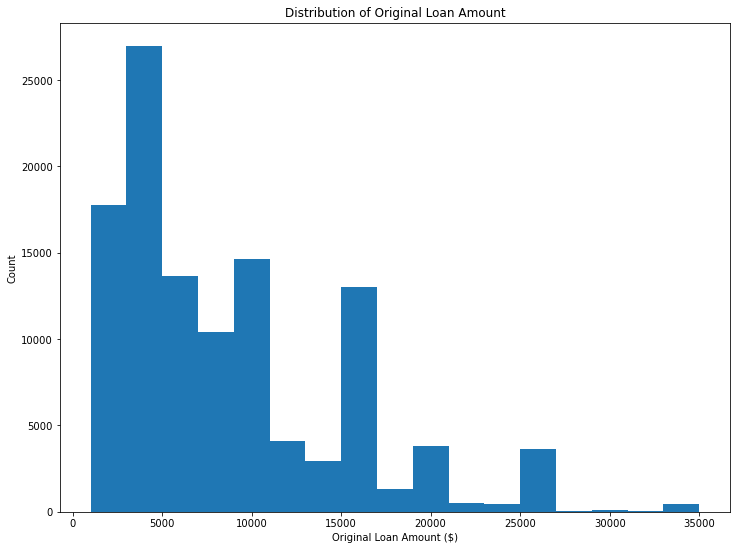

In [326]:
#Histogram to display distribution of the loan original amount
bins=np.arange(1000, loans_data['LoanOriginalAmount'].max()+2000, 2000)
plt.hist(data=loans_data, x='LoanOriginalAmount', bins=bins);
plotlabels('Original Loan Amount ($)', 'Count', 'Distribution of Original Loan Amount');

> Distibution is right skewed, let's see if applying the log transformation we can have a normal distribution

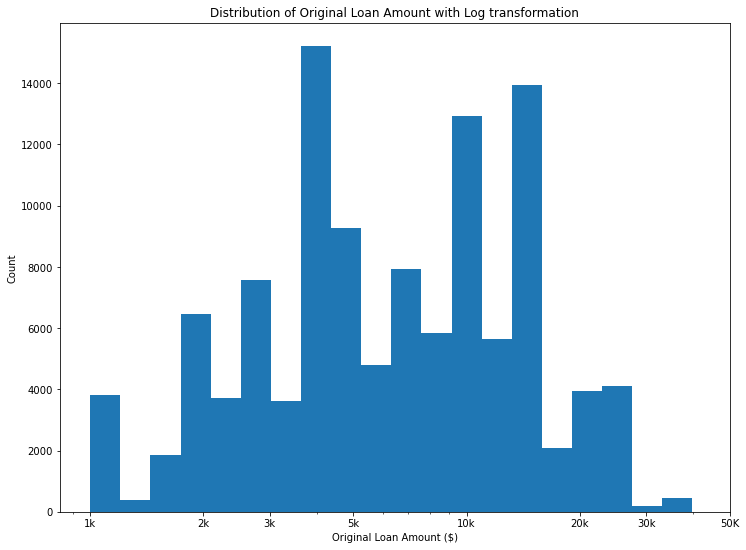

In [327]:
#Plotting a histogram based on Log transformation
bin_edges =10** np.arange(3.0,np.log10(loans_data.LoanOriginalAmount).max()+0.08,0.08)
plt.hist(data=loans_data, x='LoanOriginalAmount', bins=bin_edges);
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plotlabels('Original Loan Amount ($)', 'Count', 'Distribution of Original Loan Amount with Log transformation');

> After the log transformation, the distribution is now Multi-modal with highest peak of Loan amount at 4k-5k dollars. Next we check the distribution of Borrowers Annual Percentage Rate (APR).

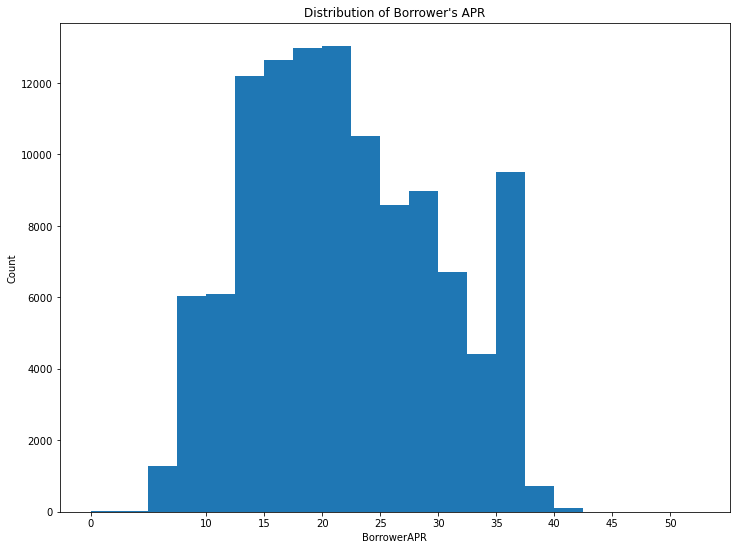

In [328]:
#Histogram to display distribution of the Borrowers Annual Percentage Rate (APR).
#Let's convert the value to percentage
borrowerAPRpcnt= 100 * loans_data['BorrowerAPR']
bins=np.arange(0.0, borrowerAPRpcnt.max()+2.5, 2.5)
plt.hist(x=borrowerAPRpcnt, bins=bins);
tick_locs = [0,10,15,20,25,30,35,40,45,50]
plt.xticks(tick_locs, tick_locs)
plotlabels('BorrowerAPR', 'Count', 'Distribution of Borrower\'s APR');

> The distribution is normal which is symmetrical with most borrower's APR between 15-25%. Let's check the distribution of the Monthly Loan Repayment

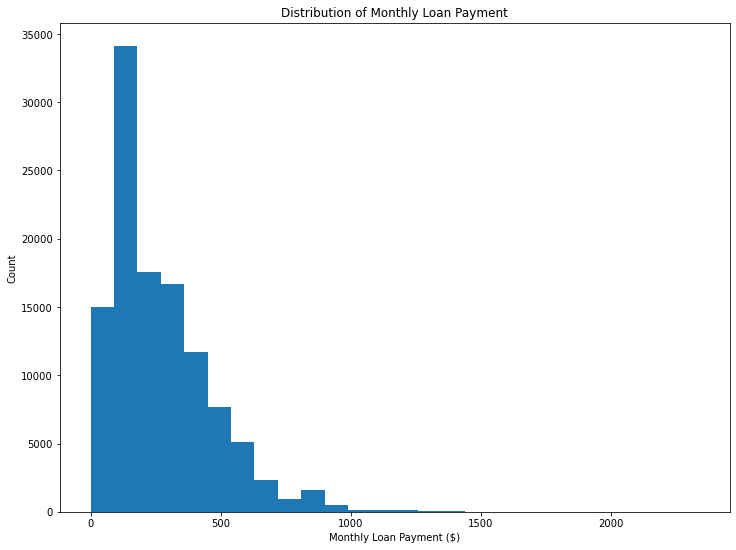

In [329]:
#Histogram to display distribution of the Monthly Loan Repayment 
bins=np.arange(0, loans_data['MonthlyLoanPayment'].max()+90, 90)
plt.hist(data=loans_data, x='MonthlyLoanPayment', bins=bins);
plotlabels('Monthly Loan Payment ($)', 'Count', 'Distribution of Monthly Loan Payment');

> The above histogram is right skewed and would need a log transformation. The below image displays a histogram after the log transformation

C:\Users\Jenny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


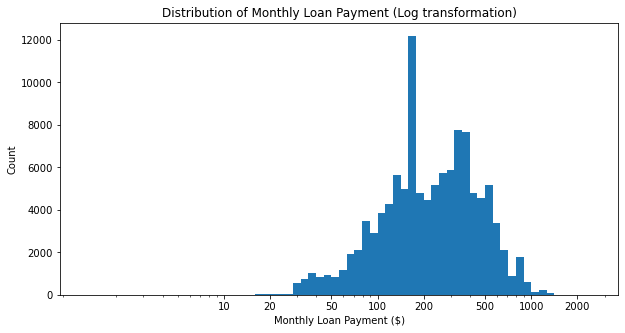

In [330]:
#Plotting a histogram based on Log transformation
plt.figure(figsize=[10, 5])
bin_edges =10** np.arange(0.1,np.log10(loans_data.MonthlyLoanPayment).max()+0.05,0.05)
plt.hist(data=loans_data, x='MonthlyLoanPayment', bins=bin_edges);
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plotlabels('Monthly Loan Payment ($)', 'Count', 'Distribution of Monthly Loan Payment (Log transformation)');

> This shows the peak monthly payment between 100 to 200 dollars. 

> Let's look at the stated monthly income of borrowers, from the statistcs we can see a very high number so we go straight to using the log transformation

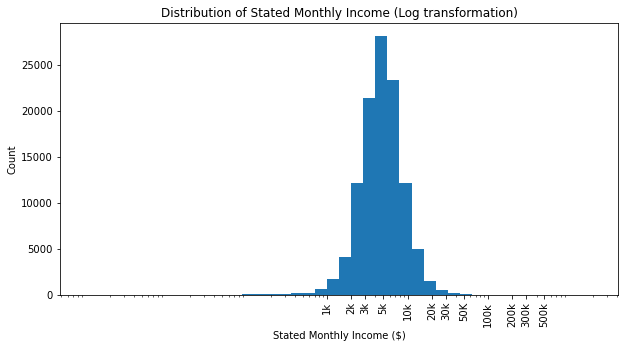

In [331]:
#Plotting a histogram based on Log transformation for stated monthly income
plt.figure(figsize=[10, 5])
bin_edges =10** np.arange(0.0,np.log10(loans_data.StatedMonthlyIncome).max()+0.15,0.15)
plt.hist(data=loans_data, x='StatedMonthlyIncome', bins=bin_edges);
plt.xscale('log')
plt.xticks([1e3, 2e3,3e3, 5e3, 1e4,2e4, 3e4, 5e4,1e5,2e5,3e5,5e5],
           ['1k','2k','3k', '5k', '10k','20k', '30k', '50K','100k','200k','300k','500k'])
plt.xticks(rotation=90);
plotlabels('Stated Monthly Income ($)', 'Count', 'Distribution of Stated Monthly Income (Log transformation)');

> The above plot shows a normal distribution with most borrowers monthly income between 4k-6k dollars. Finally let's view the distribution of Loan Investors

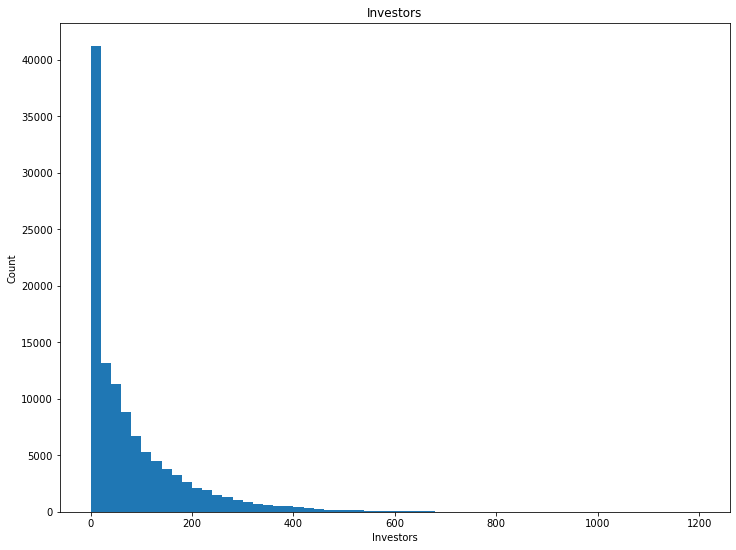

In [332]:
#Histogram to display distribution of Investors
bins=np.arange(0, loans_data['Investors'].max()+20, 20)
plt.hist(data=loans_data, x='Investors', bins=bins);
plotlabels('Investors', 'Count', 'Investors');

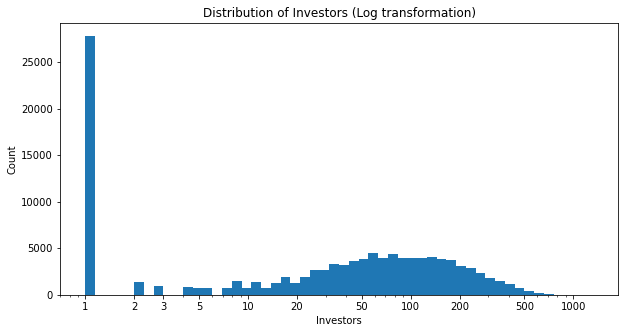

In [268]:
#Plotting a histogram based on Log transformation
plt.figure(figsize=[10, 5])
bin_edges =10** np.arange(0.0,np.log10(loans_data.Investors).max()+0.06,0.06)
plt.hist(data=loans_data, x='Investors', bins=bin_edges);
plt.xscale('log')
plt.xticks([1,2,3,5,10, 20, 50, 100, 200, 500, 1e3], ['1','2','3','5','10', '20','50', '100', '200', '500', '1000',])
#plt.xticks(rotation=90);
plotlabels('Investors', 'Count', 'Distribution of Investors (Log transformation)');

> From the above chart we can see that majority of the loans have just one investor. We would see if this is based on Loan amount in further analysis.

> Now let's have a look at the date/time features.

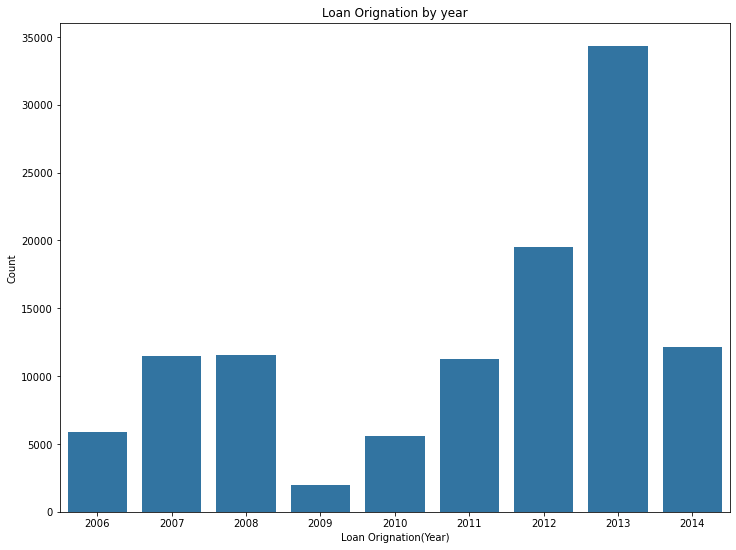

In [333]:
# Loan Origination by Year
sns.countplot(data=loans_data,x=loans_data['LoanOriginationDate'].dt.year, color =c)
plotlabels('Loan Orignation(Year)', 'Count', 'Loan Orignation by year');

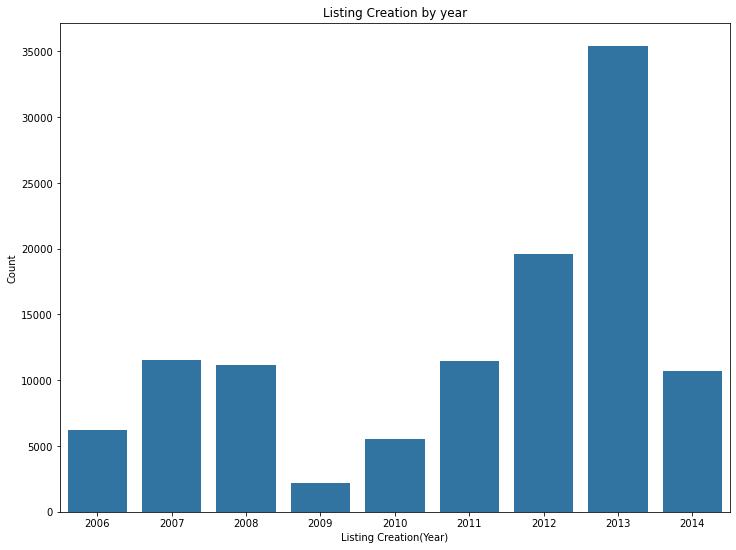

In [53]:
# Listing creation by Year
sns.countplot(data=loans_data,x=loans_data['ListingCreationDate'].dt.year, color =c)
plotlabels('Listing Creation(Year)', 'Count', 'Listing Creation by year');

> The two charts above displays similar trends with a drop in 2009 and and increase in 2013 for both Loan origination and Listing creation. The drop in 2009 maybe related to the recession during the previous year.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Loan status data type was modified to become a categorical type while the Borrower's APR had a normal distribution hence no need for any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data provided had some many columns that was going to be useful for analysis and thus such columns were dropped to make the dataset manageable.
During assesment, it was discovered that the CreditGrade and Prosper Grade has similar grading structure and where the former stopped pre 2009 the latter started post 2009 and thus it was decided to merge the two columns with generalised name called Grades. 
Rows with Null values in the features needed for investigation was removed and modification of data types for datetime and categorical columns was performed.
Some features had skewed distributions most of which where right skewed and this was transformed using a log-scale for proper analysis.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [336]:
#Classification of the various features according to type to examine the relationship between the features
num_type = ['LoanOriginalAmount','BorrowerRate', 'BorrowerAPR','StatedMonthlyIncome',
            'Investors','MonthlyLoanPayment', 'ProsperScore']
cat_type = [ 'LoanStatus','Term', 'EmploymentStatus', 'ListingCategory',
                'IncomeRange', 'Rating']

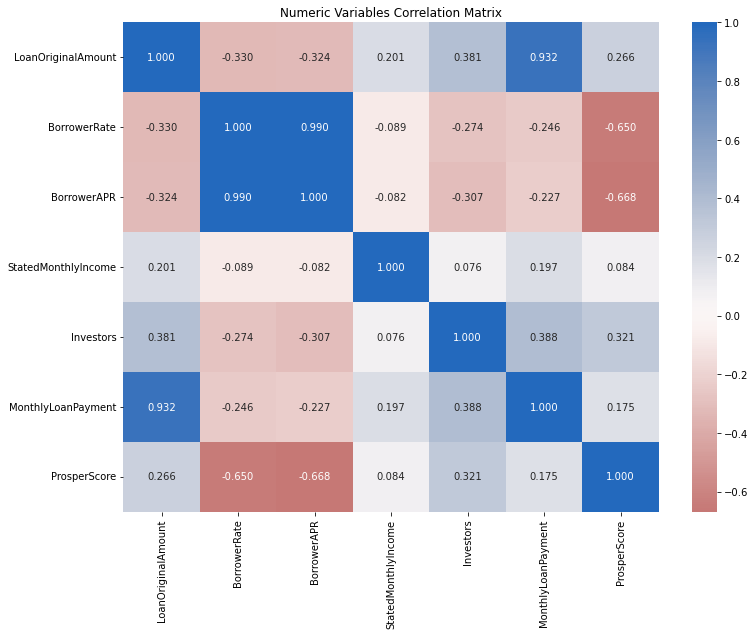

In [337]:
#Correlations between numeric variables
#plt.figure(figsize = [8, 5])
sns.heatmap(loans_data[num_type].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Numeric Variables Correlation Matrix');

> Based on the correlation matrix above, there were relationships between the below features:

1. ProsperScore and BorrowerRate: A negative correlation exists which indicates the higher the ProsperScore the lower the BorrowerRate and vice-versa.
2. ProsperScore and BorrowerAPR: A negative correlation exists which indicates the higher the ProsperScore the lower the BorrowerAPR and vice-versa.
3. LoanOriginalAmount and MonthlyLoanPayment. A strong positive correlation exists this indicates that the higher the LoanOriginalAmount the higher the MonthlyLoanPayment.
4. BorrowerAPR and BorrowerRate: There is a strong positive correlation between these two features which is not suprising considering that they are both annual and monthly interest rate respectively.

> Going further we would explore some of these relationships beginning with the ProsperScores and BorrowerAPR

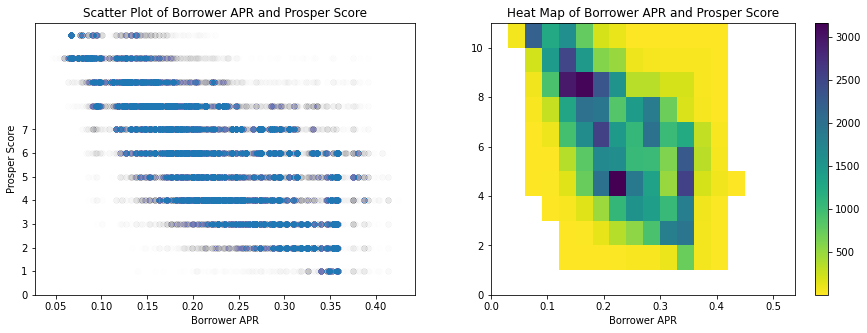

In [339]:
# scatter and heat plot to check the relationship between Borrower APR and Prosper Score.
plt.figure(figsize = [15, 5]) 
plt.subplot(1, 2, 1)
plt.scatter(data = loans_data, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 8, 1))
plotlabels('Borrower APR','Prosper Score','Scatter Plot of Borrower APR and Prosper Score');

plt.subplot(1, 2, 2)
x_bin = np.arange(0, loans_data['BorrowerAPR'].max()+0.03, 0.03)
y_bin = np.arange(0, loans_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = loans_data, x = 'BorrowerAPR', y = 'ProsperScore', bins = [x_bin, y_bin], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plotlabels('Borrower APR','','Heat Map of Borrower APR and Prosper Score');


> Based on the scatter plot and Heat Map above that displays the relationship between Borrower APR and Propser Score, we can see that it is negative trend, points keep increasing as it goes downwards. This indicates that the higher the prosper score, the lower the borrower APR and vice versa.

> Let's examine the relationship between our two features of interest Loan original amount and borrower APR

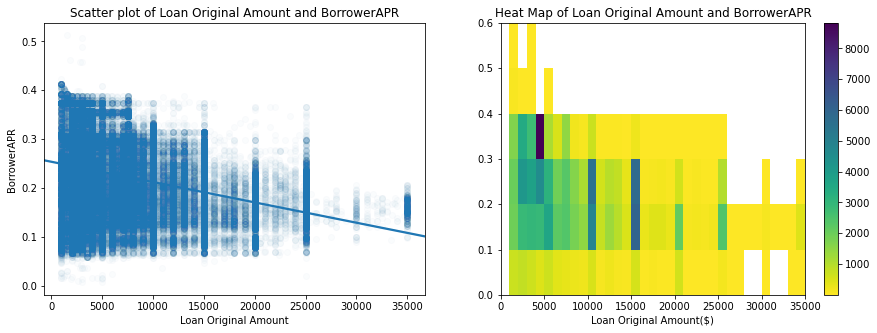

In [269]:
# scatter and heat plot to check the relationship between Loan orignal amount and Borrower APR.
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sns.regplot(data = loans_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
            truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/50});
plotlabels('Loan Original Amount($)','BorrowerAPR','Scatter plot of Loan Original Amount and BorrowerAPR');

plt.subplot(1, 2, 2)
x_bin = np.arange(0, loans_data['LoanOriginalAmount'].max()+1000, 1000)
y_bin = np.arange(0, loans_data['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = loans_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [x_bin, y_bin], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plotlabels('Loan Original Amount($)','','Heat Map of Loan Original Amount and BorrowerAPR');

> This displays a negative trend which indicates that the higher the Loan Original amount the lower the borrower APR. The heat map displays same negative trend and showing high counts between 5k-10k dollars.

> As seen earlier in the descriptive statiscs 75% of borrowers have their income at 6821 dollars and the maximun income is 1.75m dollars. This means there would be some many outliners. Let's perform our analysis removing this outliner by selecting over 75% of the base for analysis 

In [88]:
#Creating a dataframe without the outliners
df_wo_SIoutliner = loans_data[loans_data['StatedMonthlyIncome'] < 10000]

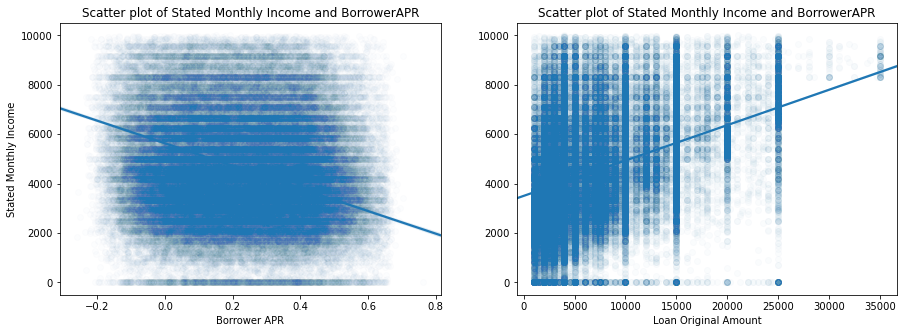

In [102]:
# plots to check the relationship between Stated Monthly Income against Loan orignal amount and Borrower APR.
plt.figure(figsize = [15, 5]) 
plt.subplot(1, 2, 1)
sns.regplot(data = df_wo_SIoutliner, x = 'BorrowerAPR', y = 'StatedMonthlyIncome', 
            truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/100});

plotlabels('Borrower APR','Stated Monthly Income','Scatter plot of Stated Monthly Income and BorrowerAPR');
plt.subplot(1, 2, 2)
sns.regplot(data = df_wo_SIoutliner, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', 
            truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/50});
plotlabels('Loan Original Amount ($)','','Scatter plot of Stated Monthly Income and Loan Original Amount');

> This shows that as the monthly income decreases, the Borrower APR increases and as the monthly income increases the Loan original amount also increases

> To round off with the relationships between numerical variables, we check the relationship between investors and Loan original amount as well as investors and Borrower APR

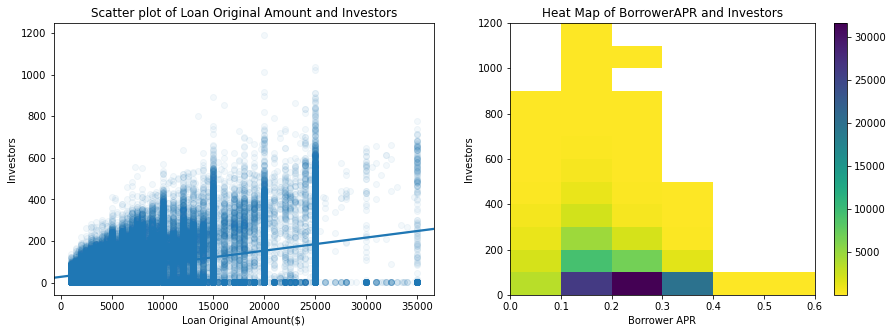

In [340]:
# scatter and heat plot to check the relationship between Loan orignal amount and Investors; Investors and Borrower APR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sns.regplot(data = loans_data, x = 'LoanOriginalAmount', y = 'Investors', 
            truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plotlabels('Loan Original Amount($)','Investors','Scatter plot of Loan Original Amount and Investors');

plt.subplot(1, 2, 2)
x_bin = np.arange(0, loans_data['BorrowerAPR'].max()+0.1, 0.1)
y_bin = np.arange(0, loans_data['Investors'].max()+100, 100)
plt.hist2d(data = loans_data, x = 'BorrowerAPR', y = 'Investors', bins = [x_bin, y_bin], 
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plotlabels('Borrower APR','Investors','Heat Map of BorrowerAPR and Investors');

> There is an upward trend in the scatter plot showing a positive relationship between the Loan original amount and Investors. The higher the amount the higher the number of investors. The heat map on the other hand shows a downward negative relationship between the Investors and Borrower APR. This shows that the higher the investors the lower the borrower APR. 

> Let's find out the relationship between the categorical variables and the numeric variables

In [345]:
#Function to create a box grid
def boxplotgrid(x, y, **kwargs):
    sns.boxplot(x=x, y=y, color = c);

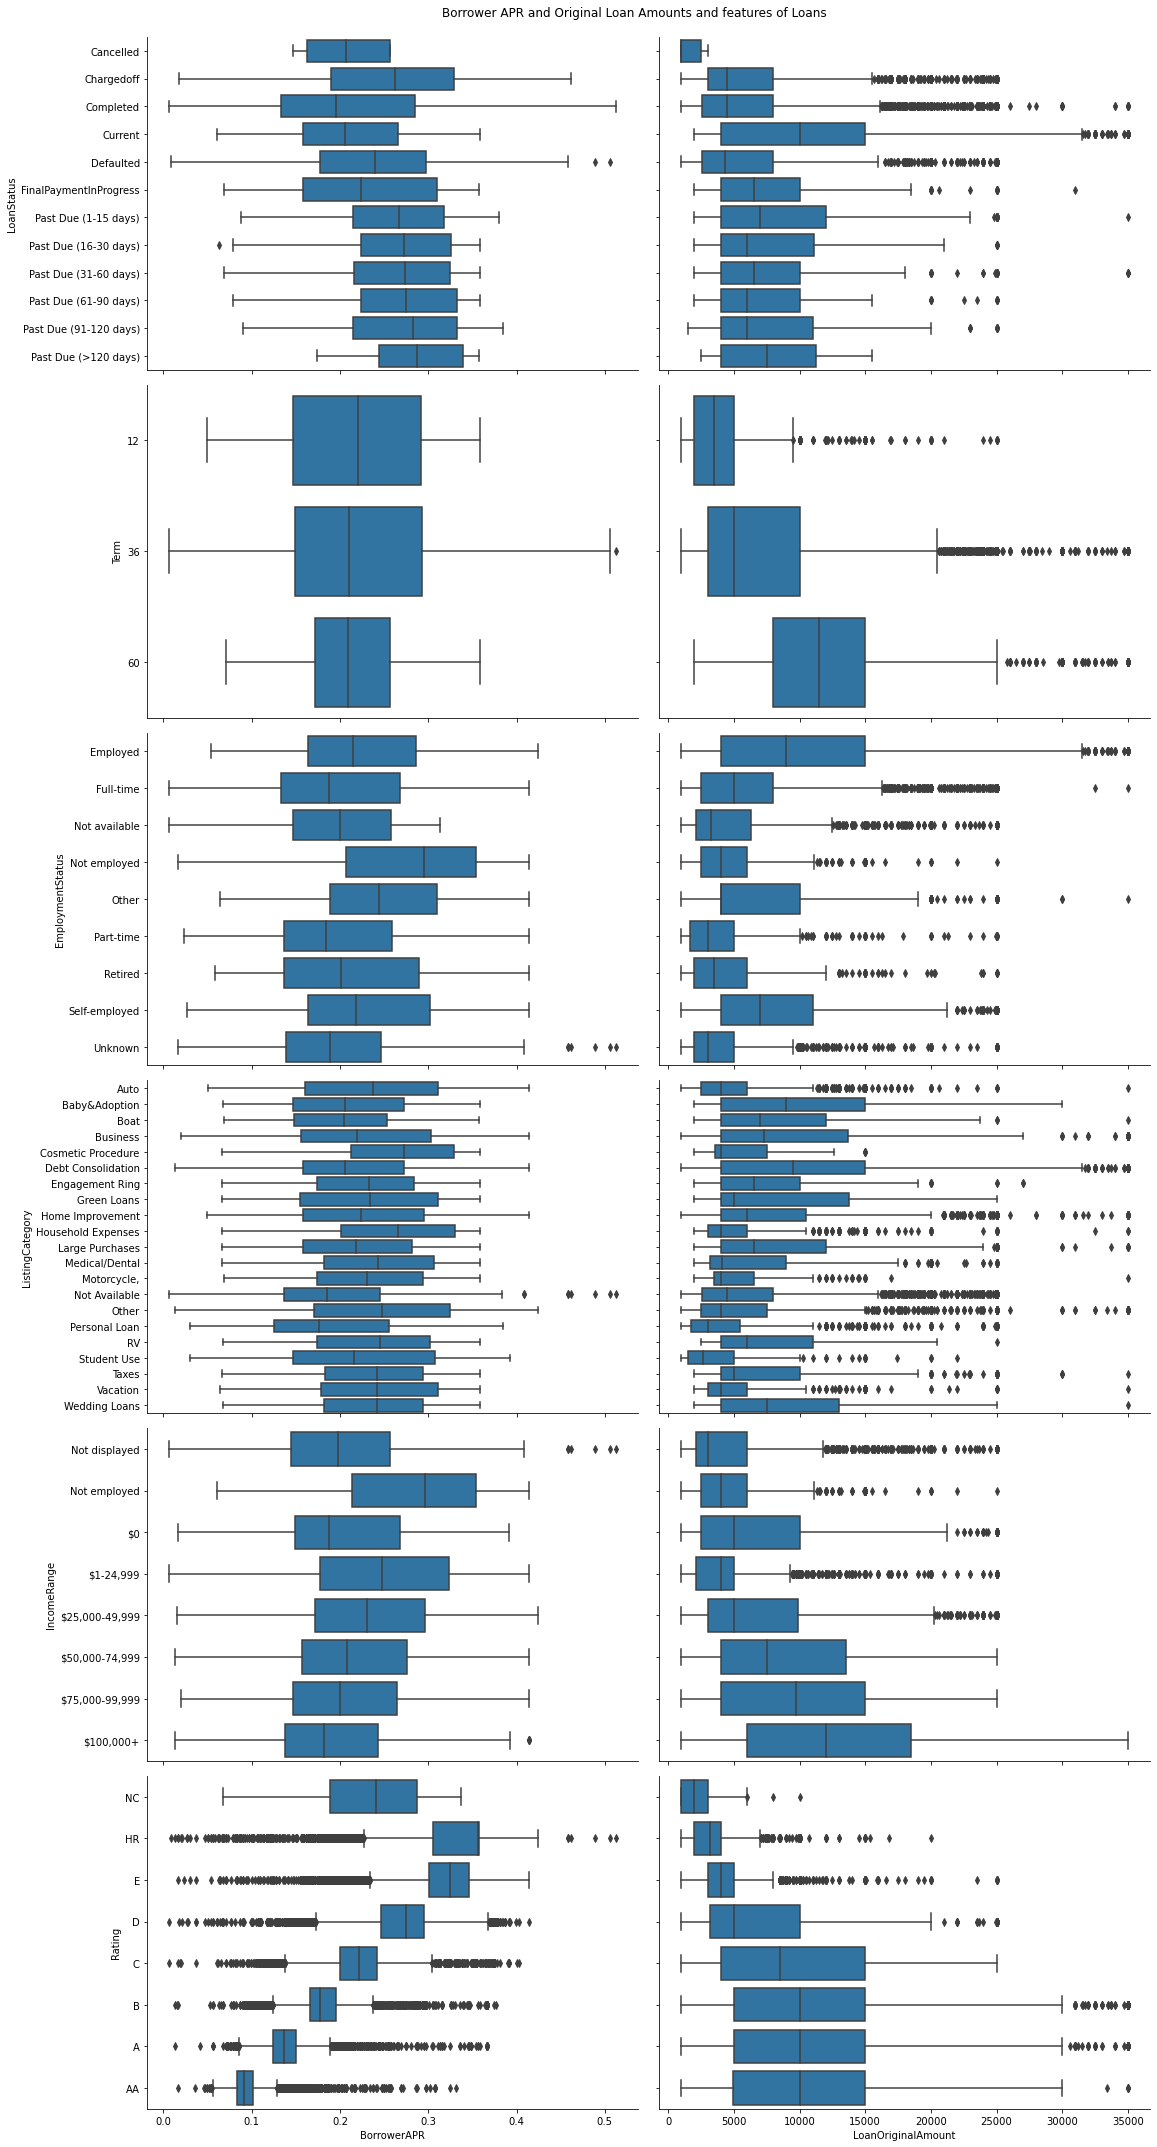

In [67]:
#Check the relationship between the categorical variables on Numerical variables BorrowerAPR and Loan Original Amount
#plt.figure(figsize = [15, 5]);
g = sns.PairGrid(data = loans_data, y_vars = cat_type , x_vars = ['BorrowerAPR', 'LoanOriginalAmount'], height = 5, aspect = 1.5)
g.map(boxplotgrid)
g.fig.suptitle('Borrower APR and Original Loan Amounts and features of Loans',  y=1.00);

> The below are observations from the plot above:

1. Ratings also impact the Loan original amount as the lower the rating of a borrower, the lower the amount he borrows.
2. Those not employed also have a higher borrower APR while those earning from 100k dollars above have high loan original amount.
3. Personal loans have lower borrower APR than cosmetic procedures while those that listed debt consolidation took larger loan amount interesting to note that those listed as cosmetic procedures took a lesser amount perhaps the interest rate discouraged them from taking higher.
4. Borrowers who are not employed have a higher borrower APR compared to those full time and part-time and those whose employment status was not available took lesser loan amount than the employed who took higher loan amount.
5. Borrowers with lesser term of 12 months have a higher APR than those with 36 months and 60 months with those with a 60months term taking a larger loan amount.
6. Loans with higher APR are charged off while those with lower APR are completed. Loans that are cancelled have a small loan original amount compared to loans that are currently ongoing.


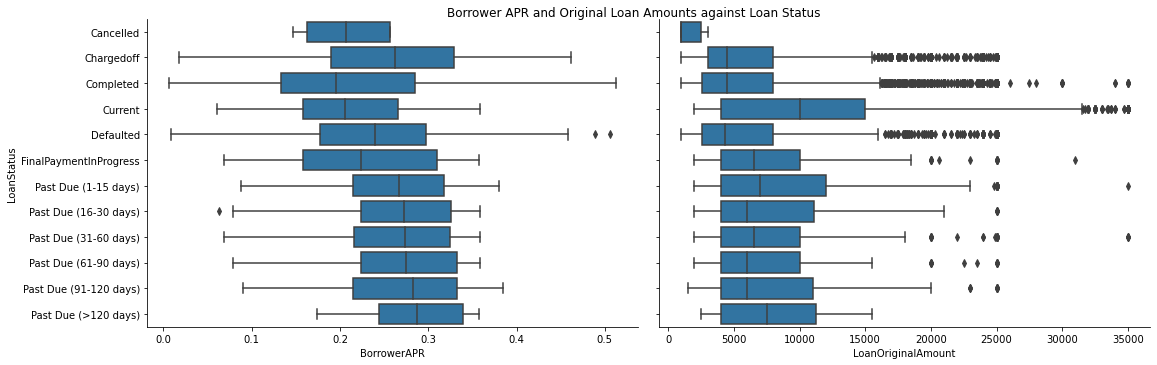

In [68]:
#we take a look at the relationship between Loan status versus Borrower APR and Loan Original Amount
#plt.figure(figsize = [20, 20]);
g = sns.PairGrid(data = loans_data, y_vars = 'LoanStatus' , x_vars = ['BorrowerAPR', 'LoanOriginalAmount'], height = 5, aspect = 1.5);
g.map(boxplotgrid);
g.fig.suptitle('Borrower APR and Original Loan Amounts against Loan Status',  y=1.00);

> Those who have status as current have a wide spread with an average of 0.2% APR while those loans which have been charged off has a higher APR compared to completed and current stages. Majority of the loans have an average of 0.20-0.27%. Most people in the current stage have an average of 10k loan amount while the loans cancelled has the least average of 1.7k dollars, perharps that was why it was cancelled.
> It was also observed that most loans that are past due have a higher APR and higher loan amount.

> Let's check the relationship between borrowerAPR and Listing category

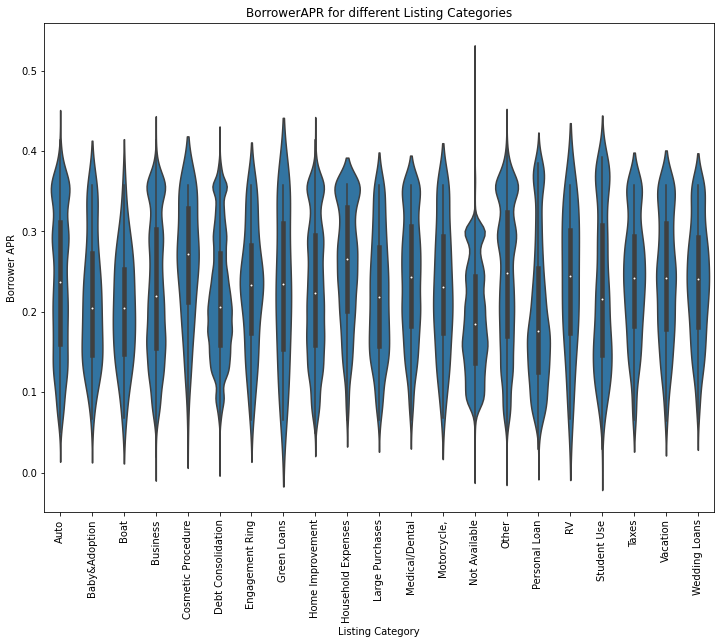

In [69]:
#Voilin plot to check relationship between borrowerAPR and ListingCategory
sns.violinplot(data=loans_data,x='ListingCategory', y='BorrowerAPR',color=c);
plotlabels('Listing Category', 'Borrower APR', 'BorrowerAPR for different Listing Categories')
plt.xticks(rotation=90);

> From the plot, we observe that borrowers who had cosmetic procedures as reason for loan have a higher APR compared to those who listed Personal loan.

In [285]:
corr_check=loans_data.groupby(['LoanStatus'])['LoanOriginalAmount']
corr_check.describe()

,count,mean,std,min,25%,50%,75%,max
LoanStatus,,,,,,,,
Cancelled,5.0,1700.000000,974.679434,1000.0,1000.0,1000.0,2500.0,3000.0
Chargedoff,11986.0,6400.701568,5340.955534,1000.0,3000.0,4500.0,8000.0,25000.0
Completed,37927.0,6197.054394,5092.145450,1000.0,2551.0,4500.0,8000.0,35000.0
Current,56576.0,10360.835018,6519.064012,2000.0,4000.0,10000.0,15000.0,35000.0
Defaulted,5015.0,6487.089731,5846.739660,1000.0,2550.0,4300.0,8000.0,25000.0
FinalPaymentInProgress,205.0,8346.121951,6144.829289,2000.0,4000.0,6500.0,10000.0,31000.0
Past Due (1-15 days),806.0,8468.445409,5492.169834,2000.0,4000.0,7000.0,12000.0,35000.0
Past Due (16-30 days),265.0,8156.430189,5368.659066,2000.0,4000.0,6000.0,11129.0,25000.0
Past Due (31-60 days),363.0,8534.336088,6247.274165,2000.0,4000.0,6500.0,10000.0,35000.0


> Let's have a look at how the categorical variables relate with each other

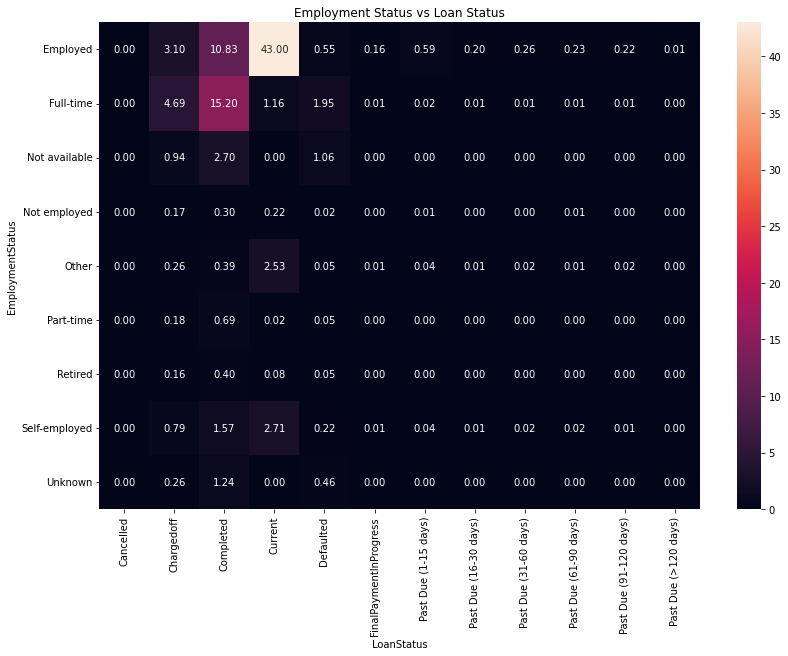

In [136]:
#Pivot heat map to display the relationship between Employment Status and Loan Status
pivot_map = pd.pivot_table(loans_data, values='LoanOriginationDate', index='EmploymentStatus', 
                         columns='LoanStatus', aggfunc='count') / len(loans_data) * 100
ax = sns.heatmap(data=pivot_map, annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Employment Status vs Loan Status');
plt.show()

> It is interesting to note that self-employed have a larger amount of defaulters compared to those not employed.
Those whose employment are not available do not seem to have any current loan. Those in full time have a higher charge off and defaulted rate compared to other employment categories whilst still having a high completed rate. Those employed make up most of those still in current status.

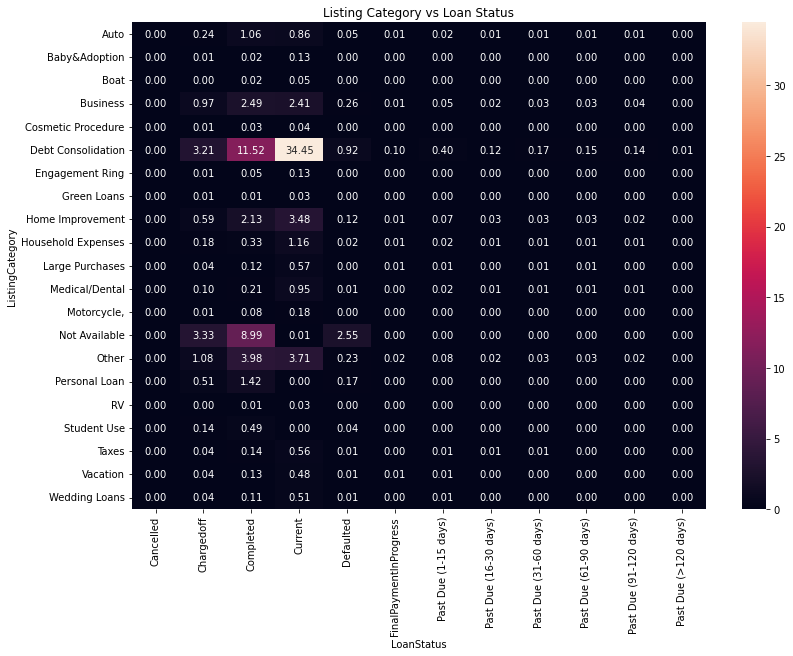

In [138]:
#Pivot heat map to display the relationship between Listing Category and Loan Status
pivot_map = pd.pivot_table(loans_data, values='LoanOriginationDate', index='ListingCategory', 
                         columns='LoanStatus', aggfunc='count') / len(loans_data) * 100

ax = sns.heatmap(data=pivot_map, annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Listing Category vs Loan Status');
plt.show()

> There is need to find out what category are missing from the listing as most borrowers who select not available have the highest number of defaulted and chargedoff loans. Majority of the current loans are listed as debt consolidation.

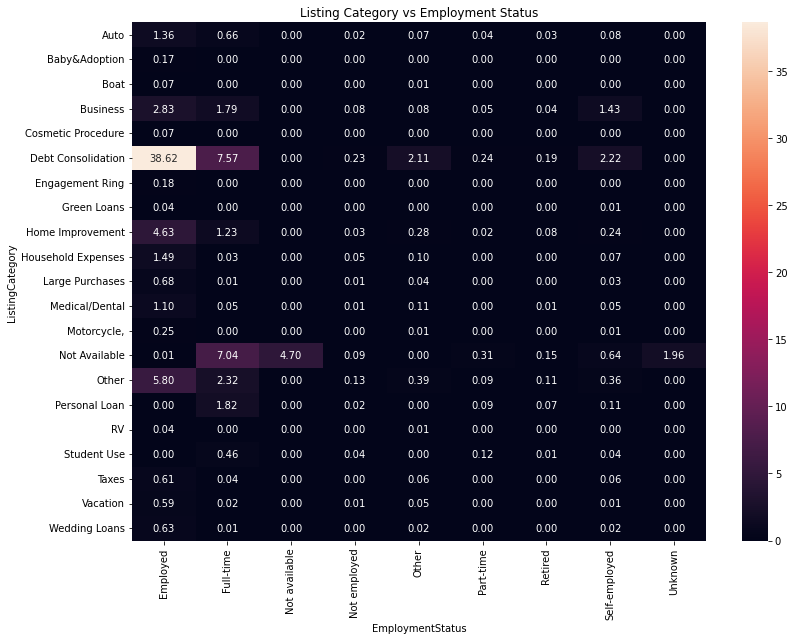

In [283]:
#Pivot heat map to display the relationship between Listing Category and Employment Status
pivot_map = pd.pivot_table(loans_data, values='LoanOriginationDate', index='ListingCategory', 
                         columns='EmploymentStatus', aggfunc='count') / len(loans_data) * 100

ax = sns.heatmap(data=pivot_map, annot=True, fmt='.2f')
plt.title('Listing Category vs Employment Status')
plt.tight_layout()
plt.show()

> Majority of the employed borrowers listed Debt consolidation, Others and Home improvement as reason for obtaining loan. On the other hand, most full time borrowers has the highest count of not avaliable and personal loans as reasons. Makes sense that the second highest reason chosen by self-employed was business after debt consolidation which is the major reasons loans were taken.

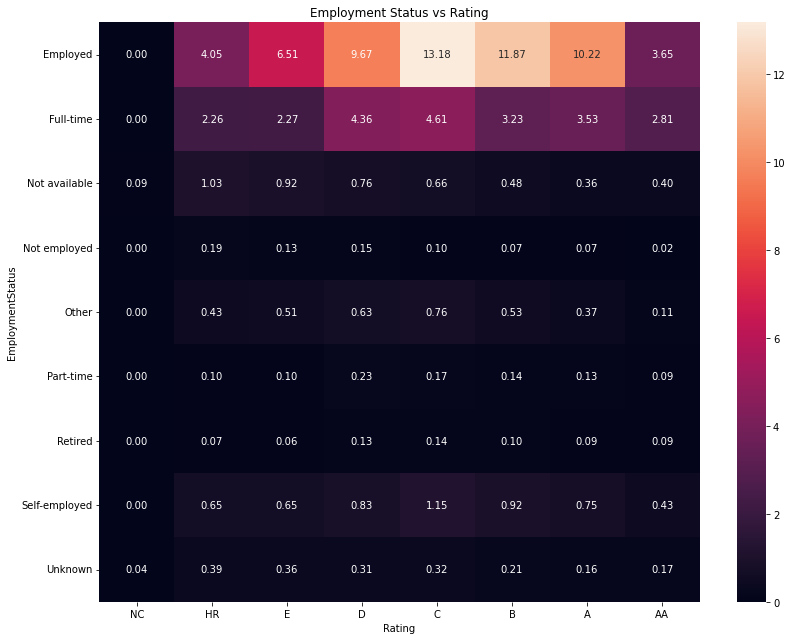

In [148]:
#Pivot heat map to display the relationship between Employment Status and Rating
pivot_map = pd.pivot_table(loans_data, values='LoanOriginationDate', index='EmploymentStatus', 
                         columns='Rating', aggfunc='count') / len(loans_data) * 100

ax = sns.heatmap(data=pivot_map, annot=True, fmt='.2f')
plt.title('Employment Status vs Rating')
plt.tight_layout()
plt.show()

> Those not employed and whose employement status is not available recieved the lower rating of an HR on the other hand, Employed user had the highest ratings of C and above with most employed borrowers with C rating. Those with the highest rating of AA are Employed and in Full time while those with the lowest rating of NC have their employment status as Not available

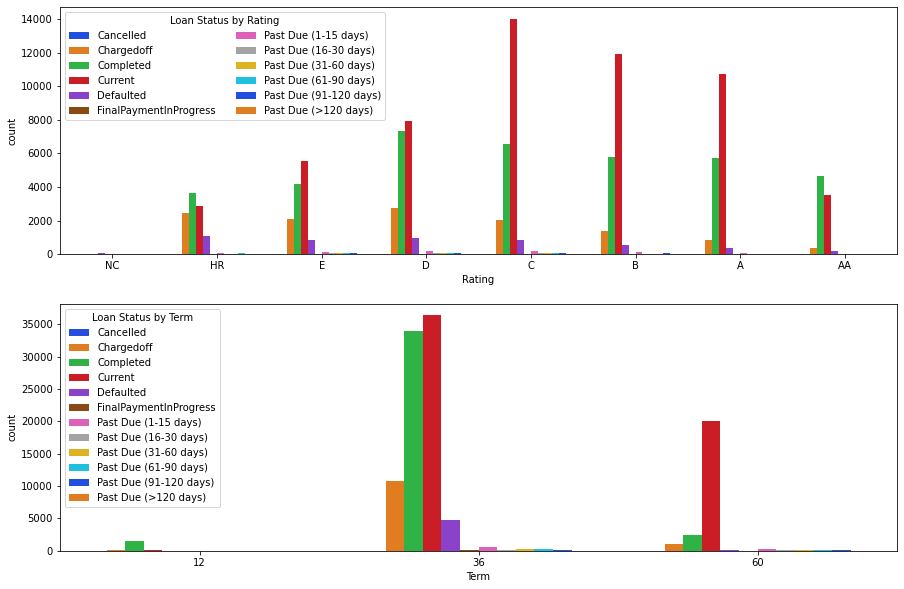

In [147]:
plt.figure(figsize = [15, 10])
# Ratings Vs Loanstatus
ax = plt.subplot(2, 1, 1)
ax = sns.countplot(data = loans_data, x= 'Rating', hue= 'LoanStatus', palette = 'bright')
ax.legend(loc=2, ncol = 2, title='Loan Status by Rating')

#Term vs Loan Status
ax = plt.subplot(2, 1, 2)
ax = sns.countplot(data = loans_data, x= 'Term', hue= 'LoanStatus', palette = 'bright')
ax.legend(loc=2, title='Loan Status by Term');

> It is interesting but not suprising to see that most borrowers that have good ratings from C, B and A have a higher percentage of them currently in the Loan cycle while a higher percentage of borrowers with ratings HR have defaulted and chargedoff while those in AA tend to have completed their Loans.

> Most Loans are given to those with ratings C.Loans with higher ratings AA have a high completed status and a low default rate while loans with Rating HR(High Risk) have a high charge off and defaulted status

> Loans are given to mostly to the employed with most of them in the current status while borrowers that are full time tend to have higher completed status and also high chargedoff and default rate.

> Borrower listed categories are mostly due to debt consolidation while others tend to choose not available. There is need to confirm why borrowers choose not available so as to include their options in the category.

> Majority of borrowers choose the 36 term with most of them completed and in current status.

> Finally we proceed to understand the relationship between the time variables and the other variables

In [347]:
#function that calculates the day difference.
def date_difference(d1, d2):
    d1 = d1.dt.strftime("%Y-%m-%d")
    d2 = d2.dt.strftime("%Y-%m-%d")
    d1 = d1.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    d2 = d2.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    return (d2-d1).dt.days

In [348]:
#Assiging variables and calling the function
d1 = loans_data['ListingCreationDate']
d2 = loans_data['LoanOriginationDate']
loans_data['duration'] = date_difference(d1, d2)

In [349]:
#  We would break down the duration into ranges and categorize them into ranges and categorize them for easy analysis and add the new column to the table
duration_bins = [0,7,14,30,60,530 ]
names_bins = ['less than a week','Within two weeks','within a month','within 2 months', 'greater than 2 months']
loans_data['duration_c'] = pd.cut(loans_data['duration'],bins=duration_bins,labels=names_bins)
loans_data.duration_c.value_counts()

less than a week         48114
Within two weeks         44368
within a month           16341
within 2 months           3261
greater than 2 months     1697
Name: duration_c, dtype: int64

In [350]:
#Checking the correlation of duration categories and Loan original amount
corr_check=loans_data.groupby(['duration_c'])['BorrowerAPR']
corr_check.describe()

,count,mean,std,min,25%,50%,75%,max
duration_c,,,,,,,,
less than a week,48114.0,0.224189,0.076400,0.00653,0.166530,0.21566,0.285740,0.51229
Within two weeks,44368.0,0.213682,0.082529,0.01315,0.148785,0.20367,0.277182,0.41355
within a month,16341.0,0.218433,0.084458,0.01650,0.148810,0.20613,0.288480,0.42395
within 2 months,3261.0,0.217497,0.078762,0.05927,0.156290,0.20969,0.276370,0.41355
greater than 2 months,1697.0,0.210196,0.084129,0.04583,0.142060,0.20321,0.274620,0.41355


> Most of the Loans are approved within 2 weeks from their listing date.

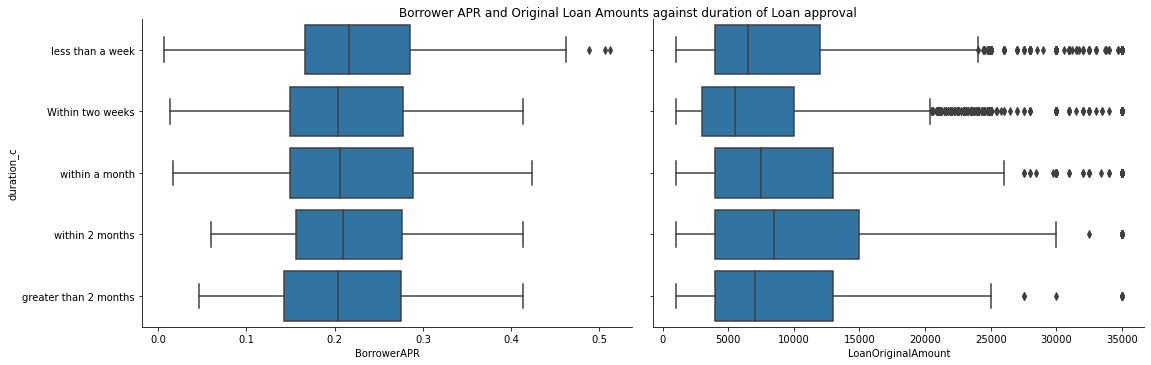

In [351]:
# A boxplot to show the impact of the feature engineered duartion categories on the Borrower APR and Loan original amount
g = sns.PairGrid(data = loans_data, y_vars = 'duration_c' , x_vars = ['BorrowerAPR', 'LoanOriginalAmount'], height = 5, 
                 aspect = 1.5);
g.map(boxplotgrid);
g.fig.suptitle('Borrower APR and Original Loan Amounts against duration of Loan approval',  y=1.00);

> The plot above shows that the delay between listing date and loan origination date depends on the Loan original amount. We observe that the lesser the Loan original amount ,the faster the Loan is approved. Loan origination amount having an average of 8k and 7k are typically approved within two weeks compared to those with an average of 9k and above. There doesn't seem to be much of a relationship between the borrowerAPR and duration of loan approval except that the borrower APR for those within the two weeks category tend to be lesser than others.

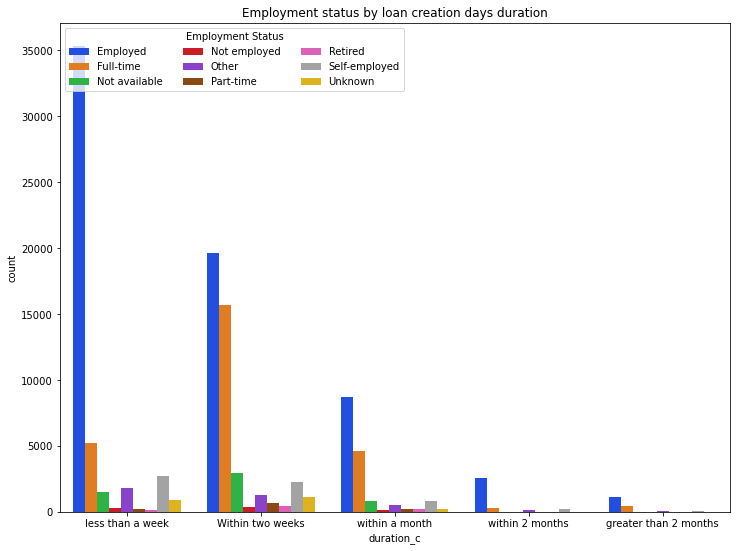

In [76]:
#Plot to display the relationship between Employment status and days between Loan approval
ax = sns.countplot(data = loans_data, x= 'duration_c', hue= 'EmploymentStatus', palette = 'bright')
ax.set_title("Employment status by loan creation days duration")
ax.legend(loc=2, ncol=3, title='Employment Status')
plt.show()

> Loans approval happens in less than a week for employed people compared to other categories while those in full time tends to have their approval within two weeks.

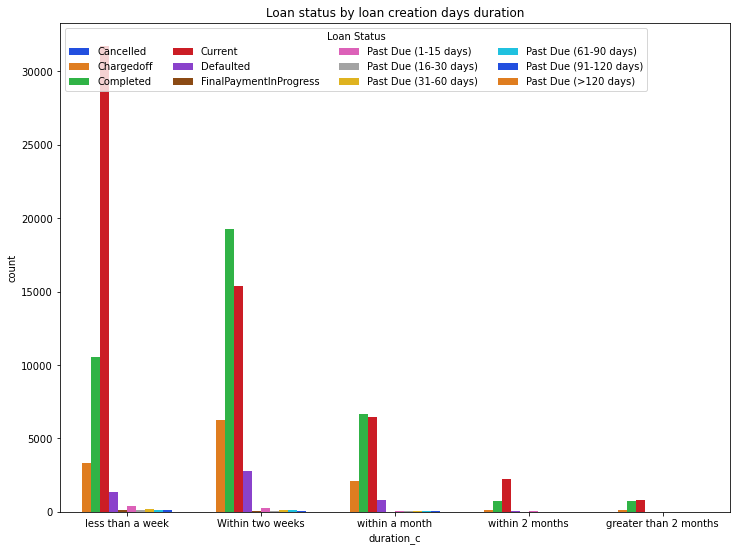

In [78]:
#Plot to show the relationship between Loan status and days it takes for loan to be approved
ax = sns.countplot(data = loans_data, x= 'duration_c', hue= 'LoanStatus', palette = 'bright')
ax.set_title("Loan status by loan creation days duration")
ax.legend(loc=2, ncol=4, title='Loan Status')
plt.show()

> Loans which are approved within a week are mostly still ongoing(currently) and completed while those approved within two weeks are mostly completed. There also seem to be an increase in charged off loans for those approvals within two weeks. As seen in some plots above, this could be due to the low interest rate and the low loan original amount in this category.

> Finally we examine the trend of Loan amounts over the years

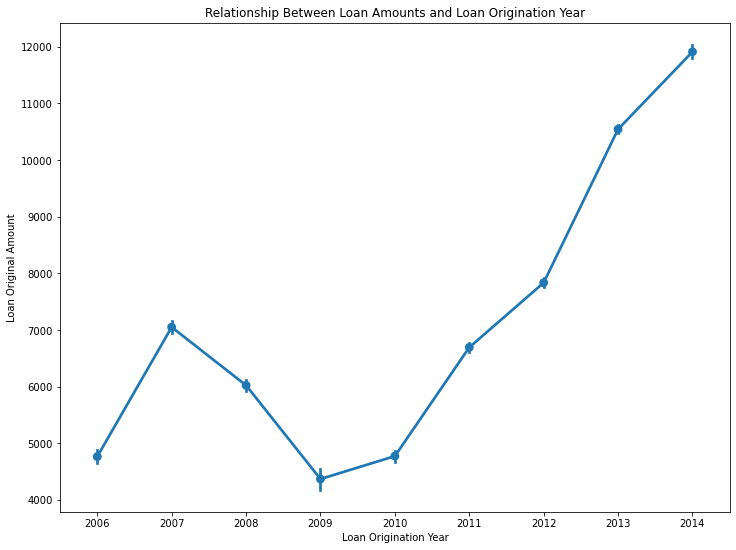

In [282]:
#fig = plt.figure(figsize=(12,6))
#We save the year from the Loan origination date
loans_data['LoanOriginationYear'] = pd.DatetimeIndex(loans_data['LoanOriginationDate']).year

#Plotting the line series
sns.pointplot(data = loans_data,y='LoanOriginalAmount', x='LoanOriginationYear')
plotlabels('Loan Origination Year', 'Loan Original Amount','Relationship Between Loan Amounts and Loan Origination Year');

> A Positive Trend can be observed in the Loan Amounts over the years. There has been a significant increase from 2009 regarding the amount of loan taken which from previous analysis was taken by employed persons earning over 100k dollars.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The heat map showed strong negative correlation between Propser score and `Borrower APR` (Feature of interest) which is not suprising as the higher your rating score, the lower the borrower APR also those with high ratings have a higher completion rate During further investigations, the below observations were made: 
1. Unemployed have a higher borrower APR while the employed have a current running loan.
2. Borrowers that have a large loan amount gets a lesser APR on the other hand those loans that have cancelled have a lesser loan amount
3. The relationship between both features of interest shows that borrowers with lower APR have mostly completed their loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> The Below are some interesting relationships observed:
1. There seem to be a relationship between listing days and loan creation days in  terms of loan original amount. The lesser the days in between the request, the lesser the loan original amount. 
2. Most loans are given to those employed with major reason as debt consolidation.
3. It was also observed that those with employment status as unemployed had a low rating at HR(high Risk) whilst those employed and full time had good ratings with the highest rating of AA made up of these categories of borrowers.
4. Suprising also to note that self-employed have a larger amount of defaulters compared to those not employed and full time borrowers have the highest rate of loan defaulters.
5. Lastly there seem to be positive relationships between Loan original amount and investors as well as stated monthly income as the higher the amount, the higher the number of investors and monthly income.

## Multivariate Exploration


> Let's look further into the impact of prosper score on Loan original amount and borrower APR.

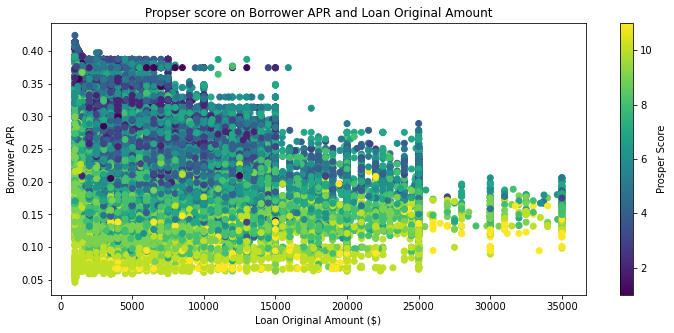

In [342]:
#Scatter plot using original LoanOriginalAmount
plt.figure(figsize=[12,5])
plt.scatter(data=loans_data, x='LoanOriginalAmount', y='BorrowerAPR', c='ProsperScore');
plt.colorbar(label='Prosper Score');
#plt.xlim(400, 900);
plotlabels('Loan Original Amount ($)', 'Borrower APR', 'Propser score on Borrower APR and Loan Original Amount');

> The higher the borrower APR the lower the prosper scores while the higher the Loan original amount, the higher the prosper scores. The plot is highly densed between 5k to 10k dollars and between 0.2 to 0.3 borrower APR indicating that most borrowers in the data are in those ranges.

> Let's check out the impact of Loan status in terms of the Loan original amount and Borrower APR

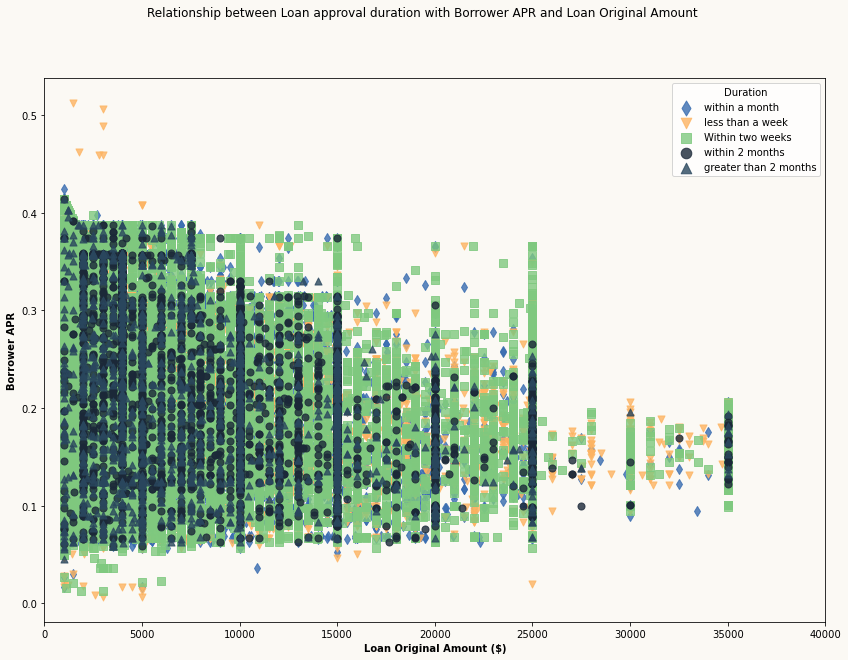

In [276]:
# Colors
bg_white = "#fbf9f4"
colors = ["#386cb0", "#fdb462", "#7fc97f", "#1B2838","#2a475e"] 

#List of the loan approval duration categories
durations = loans_data["duration_c"].unique()

# The markers we use in the scatterplot
markers =["d", "v", "s", "o", "^"]

# Initialize layout
fig, ax = plt.subplots(figsize= (14, 10))

# Background color
fig.patch.set_facecolor(bg_white)
ax.set_facecolor(bg_white)
ax.set_xlim([0, 40000])

# Loop through loan approval duration categories, colors, and markers to create a scatter plot
for duration, color, marker  in zip(durations, colors, markers):
    data = loans_data[loans_data["duration_c"] == duration]
    ax.scatter("LoanOriginalAmount", "BorrowerAPR", s=50, color=color, marker=marker, alpha=0.8, data=data  )

#storing the result
legend = ax.legend(markerscale=1.5)

# loop through text elements and categories
for text, duration in zip(legend.get_texts(), durations):
    text.set_text(duration)
    text.set_fontsize(10)

# Grab title and customize its appearence.
legend.set_title("Duration")
legend_title.set_fontsize(8)

fig.suptitle("Relationship between Loan approval duration with Borrower APR and Loan Original Amount")
ax.set_xlabel("Loan Original Amount ($)", weight="bold")
ax.set_ylabel("Borrower APR", weight="bold");

> There is a lot of data points clustered around 5k to 10k dollars thus making it hard to make any analysis for loans within that range of amount, however, it can be seen that loans that were approved within a week have a high APR for loan amount within that range. Loans approved within a week also has the highest amount with the lowest borrower APR.

> It would be interesting to find out what listing category this falls into as we move to out next plot.

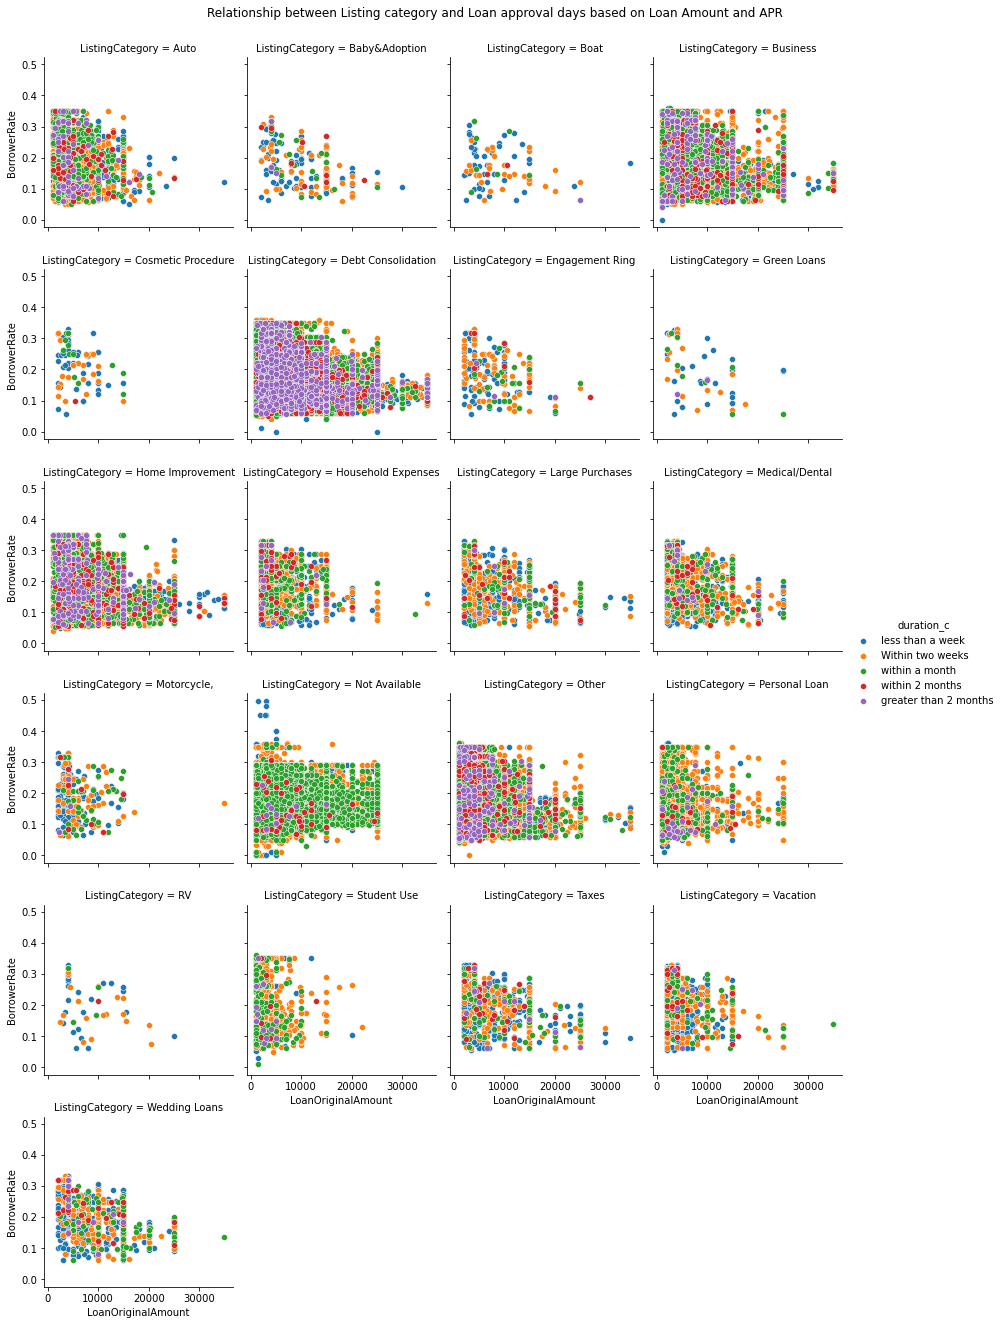

In [273]:
#Plot showing the Relationship between Listing category and Loan approval days based on Loan Amount and APR
g = sns.FacetGrid(data=loans_data, col='ListingCategory', hue='duration_c',legend_out=True, col_wrap=4)
g=(g.map(sns.scatterplot, 'LoanOriginalAmount', 'BorrowerRate' ).add_legend());
g.fig.suptitle('Relationship between Listing category and Loan approval days based on Loan Amount and APR',  y=1.02);

> From this plot we can confirm that those with the highest rate are those who listed not available as a reason for taking out the loan although the loan amount taken wasn't much, there is need to cater of this type of listing.

> Majority of loans approver after two months are usually for debt consolidation, home improvement and others.

> Those who listed cosmetic procedure and RV generally seem to have their loans approved within a month.

> Debt consolidation has the a highest number of loans over 20k dollars with most of them approved after two months at an APR of less than 0.2

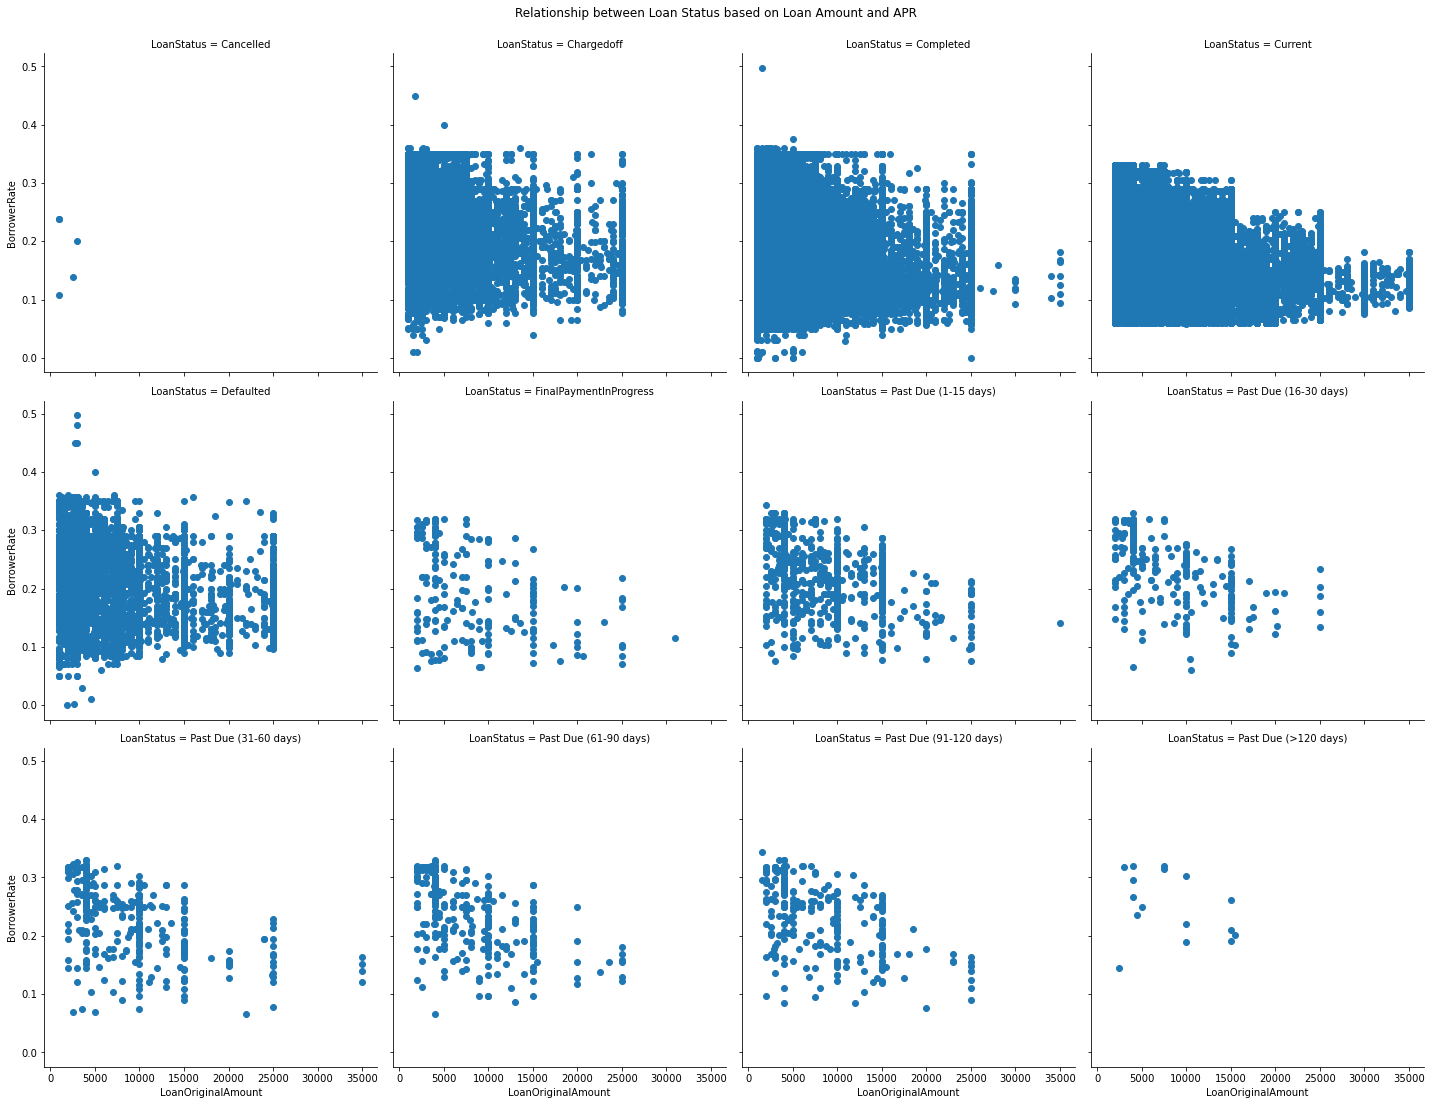

In [274]:
#Create a plot of the relationship between Loan original Amount, BorrowerRate and Loan Status
g = sns.FacetGrid(data = loans_data, col='LoanStatus', height=5, col_wrap=4)
g.map(plt.scatter,'LoanOriginalAmount', 'BorrowerRate')
g.fig.suptitle('Relationship between Loan Status based on Loan Amount and APR',  y=1.02);

> This shows the distribution of Loan original amount and borrower rate based on the different loan status.
1. Cancelled and Loan past due days by over 120 days have low distributions with cancelled loans having a very low loan original amount and low interest rate.
2. Some borrowers who defaulted, seem to have the highest borrower APR and lowest APR among all the categories.However, the amount seem to be low as well.
3. Borrowers who have completed and current in the loan have the highest amount of loan borrowed.

In [158]:
#function to create a heat map with seaborn's pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    x_bin = np.arange(0, 0.6, 0.1)
    y_bin = np.arange(0, 8, 1)
    plt.hist2d(x=x, y=y, bins = [x_bin, y_bin], cmap = palette, cmin = 0.5)
    plt.colorbar(label='count')

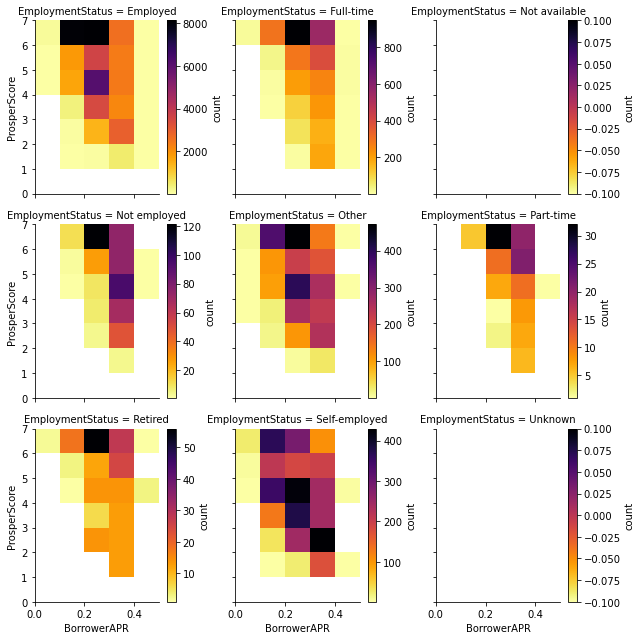

In [343]:
# create faceted heat maps on the EmploymentStatus against borrower APR and Prosper scores
g = sns.FacetGrid(data = loans_data, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'BorrowerAPR', 'ProsperScore', color = 'inferno_r')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore');

> This shows the distribution of prosperscores and borrowerAPR accross the various employment status. Few points to note that was not previously observed are:
1. Those retired, have higher prosper scores and lower borrower APR
2. Those not employed have a lower prosper score and higher borrower APR.
3. Interesting to see that those in part-time have a higher propser score and lower borrower APR compared to those self-employed who have a lower propser score and higher borrowr APR
4. Borrower's whose unemployment are unavailable do not have any prosper score assigned to them

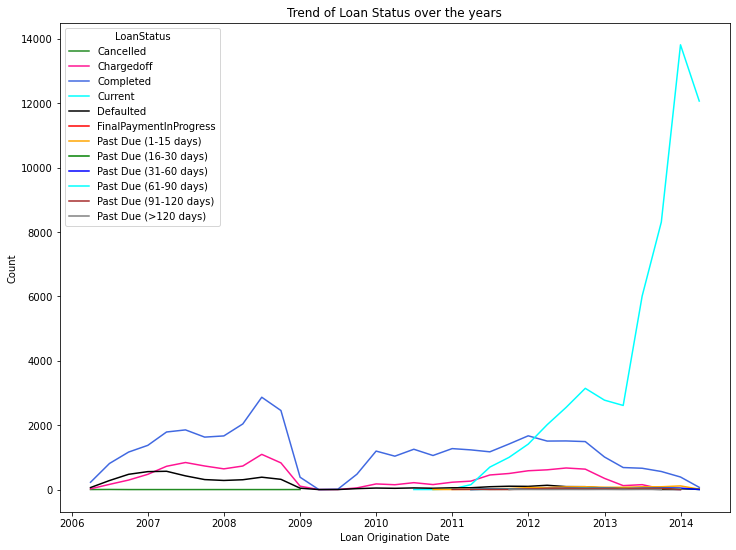

In [249]:
#Create a new dataframe with the time column to be plotted with a quaterly count
origination_date = loans_data.copy()
origination_date.index = pd.DatetimeIndex(origination_date['LoanOriginationDate'])
origination_date = pd.DataFrame(origination_date.groupby('LoanStatus').resample('Q')['index'].count())
#Plotting the time series chart
p = sns.lineplot(data=origination_date, x = 'LoanOriginationDate', y='index', hue='LoanStatus', 
             palette=['forestgreen', 'deeppink', 'royalblue', 'cyan','black','red','orange', 'green', 'blue','cyan',
                     'brown','grey']);
p.set_xlabel('Loan Origination Date')
p.set_ylabel('Count')
p.set_title('Trend of Loan Status over the years');

> The trend shows a decrease in all activities between end of 2008 and mid 2009 with loan activities picking up by late 2009.
> No loans was cancelled between 2010 and 2011.
> There was a sharp drop in defaulted loans from 2010 till 2014.
> It seems borrowers started taking loans once more in 2011, this maybe connected to the fact that the highest term is 60 and thus indicates the start of a new loan session.
> Sharp increase in current loans mid 2013.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Higher loan amounts are typically given to those with higher ratings at a low APR as well.

> Borrowers who are retired have higher prosper scores with a corresponding lower APR.

> Over the years in analysis, there was no current loan between 2006 to late 2010. It would be interesting to validate if this happened as a result of the loan term of 60 months(5 years).

### Were there any interesting or surprising interactions between features?

> Suprising to observe that no loans was cancelled between 2010 and 2011.

> Interesting to see that those in part-time have a higher propser score and lower borrower APR compared to those self-employed who have a lower propser score and higher borrowr APR.

> Loans that are approved withing 1 week of lisitng dates with a high APR are listed as Not available. It would be nice to know the exact listing type for such loans.

## Conclusions

Different explorations was performed on the data to have a clear understanding of its effect on Loan status and the borrower APR. We are trying to understand what affects a borrower's status and APR i.e based on the demographics of borrower, prosper scores and loan original amount, we should be able to tell the outcome of the Loan status and their APR. Based on analysis, the below findings was done.

1. Prosper score affects the borrower APR, the higher the score/rating the lower the APR.
2. Employed people makes up higher percentage of those that take out loan with most listing as debt consolidation.
3. Full time employment persons have a higher chance of completing their loans.
4. Small Loans with a high APR  by those whose employment are not available often times get to be cancelled.
5. The more money a person earns, the higher the loan amount taken.
6. People in California tend to take loans most of the time.
7. Unemployed borrowers get a higher APR.
8. No Loans was seen to have been cancelled between 2010 and 2011 with defaulted loans also decreasing from 2010.
9. Self employed person was seen to have a higher default rate than the unemployed.
10. Loan amounts was seen to have increased over the years.

In summary, the factor that has a higher influence on the outcome of the loan was the amount borrowed and the interest rate of the loan. Higher interest and high loan amount are more likely to be past due. The factor that mostly affected the borrowers rate as seen on the heat matrix was the prosper score. The higher the prosper score, the lower the APR. Loan amount was also seen to slightly affect the interest rate , the more the loan amount the lesser the borrower APR but wasn't majorly like the prosper score.